In [1]:
import logging

logger = logging.getLogger()

file_handler = logging.FileHandler(filename='project_log.log', mode='w')
formatter = logging.Formatter('%(asctime)s - %(name)s - %(levelname)s - %(message)s')
file_handler.setFormatter(formatter)
logger.addHandler(file_handler)

logger.setLevel(logging.DEBUG)
logger.info('PROJECT FILE STARTS RUNNING!')

In [2]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import xgboost as xgb
from imblearn.over_sampling import SMOTE
from imblearn import over_sampling

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_curve

import pickle

import warnings
warnings.filterwarnings('ignore')

logger.info('LIBRARIES IMPORTED')

In [3]:
# Importing Data
df = pd.read_csv('train_20D8GL3.csv')

In [4]:
# ID is a uniqe and diffrent for customer to customr, So dropping it
df.drop('ID',axis=1,inplace=True)

In [5]:
# Lets see the basic information of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21000 entries, 0 to 20999
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   LIMIT_BAL                   21000 non-null  int64
 1   SEX                         21000 non-null  int64
 2   EDUCATION                   21000 non-null  int64
 3   MARRIAGE                    21000 non-null  int64
 4   AGE                         21000 non-null  int64
 5   PAY_0                       21000 non-null  int64
 6   PAY_2                       21000 non-null  int64
 7   PAY_3                       21000 non-null  int64
 8   PAY_4                       21000 non-null  int64
 9   PAY_5                       21000 non-null  int64
 10  PAY_6                       21000 non-null  int64
 11  BILL_AMT1                   21000 non-null  int64
 12  BILL_AMT2                   21000 non-null  int64
 13  BILL_AMT3                   21000 non-null  int64
 14  BILL_A

        > Semua 24 kolom berisi angka dengan tipe data int atau float
        > Ada 21000 data pelanggan
        > Tidak ada missing values

In [7]:
df.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
count,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.00000,21000.000000,21000.000000,21000.00000,21000.000000,...,21000.000000,21000.000000,21000.000000,21000.000000,2.100000e+04,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000
mean,167214.746667,1.607571,1.854190,1.551714,35.461619,-0.01119,-0.127238,-0.164857,-0.21819,-0.260952,...,43387.372476,40398.551095,38931.194000,5686.349333,5.923003e+03,5202.325333,4793.172000,4797.012952,5211.736762,0.221190
std,128965.188482,0.488303,0.791628,0.521176,9.206628,1.12321,1.198957,1.198624,1.17221,1.141454,...,64081.073110,60396.811177,59196.499234,16868.075695,2.390953e+04,17006.416467,15467.403159,15270.031988,17698.795697,0.415058
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.00000,-2.000000,-2.000000,-2.00000,-2.000000,...,-170000.000000,-81334.000000,-209051.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.00000,-1.000000,-1.000000,-1.00000,-1.000000,...,2332.000000,1759.000000,1242.750000,998.250000,8.360000e+02,390.000000,284.000000,241.000000,102.000000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.00000,0.000000,0.000000,0.00000,0.000000,...,19158.500000,18266.500000,17203.500000,2100.000000,2.011000e+03,1811.500000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.00000,0.000000,0.000000,0.00000,0.000000,...,55376.750000,50517.250000,49463.000000,5023.250000,5.000000e+03,4500.000000,4002.250000,4051.000000,4000.000000,0.000000
max,800000.000000,2.000000,6.000000,3.000000,75.000000,8.00000,8.000000,8.000000,8.00000,8.000000,...,706864.000000,587067.000000,699944.000000,873552.000000,1.684259e+06,889043.000000,621000.000000,417990.000000,528666.000000,1.000000


# EDA 

In [9]:
logger.info('EDA STARTED')

In [10]:
# the repayment status is indicated in columns PAY_0, PAY_2 ... with no PAY_1 column, so we rename PAY_0 to PAY_1 
df.rename(columns={'PAY_0':'PAY_1'}, inplace=True)

In [11]:
df.rename(columns={'default_payment_next_month':'defaulter'}, inplace=True)

<Axes: xlabel='defaulter', ylabel='count'>

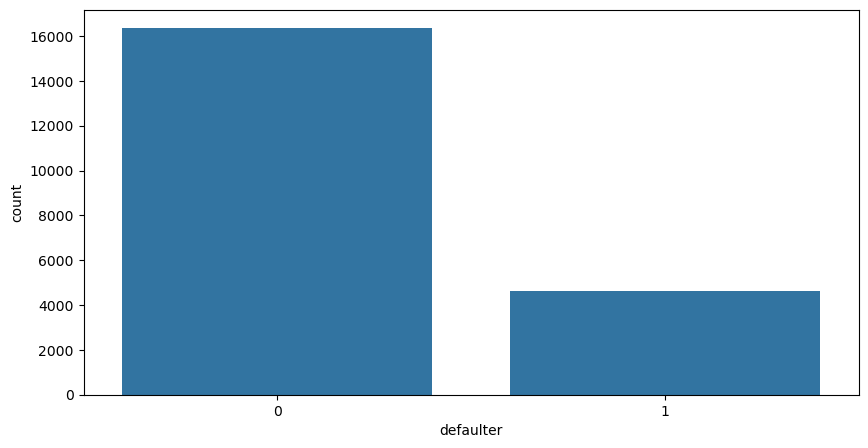

In [12]:
# Dependent Feature 
plt.figure(figsize=(10,5))
sns.countplot(x = 'defaulter', data = df)

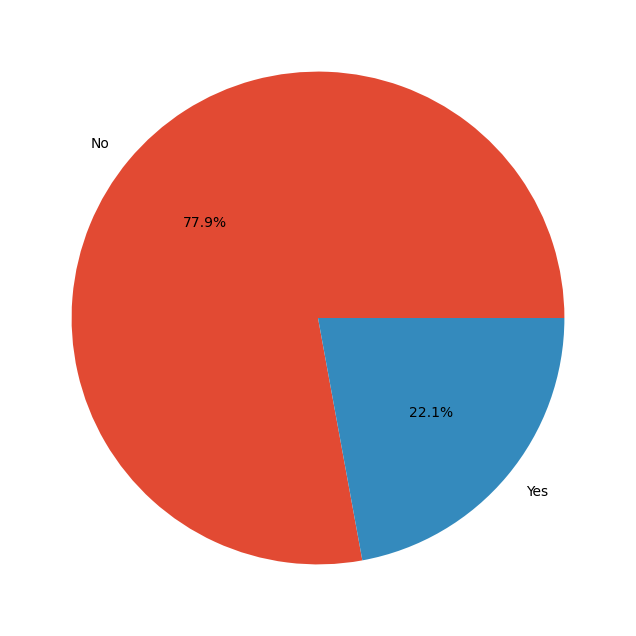

In [13]:
plt.style.use('ggplot')
plt.rcParams['figure.figsize']=(12,8)
inter=df['defaulter'].value_counts()
plt.pie(inter,labels=['No','Yes'],autopct='%0.1f%%',radius=1);

In [14]:
df['defaulter'].value_counts()

defaulter
0    16355
1     4645
Name: count, dtype: int64

Seperti yang dapat kita lihat dari grafik di atas bahwa kedua kelas tidak proporsional dan kami memiliki kumpulan data yang tidak seimbang.

<function matplotlib.pyplot.show(close=None, block=None)>

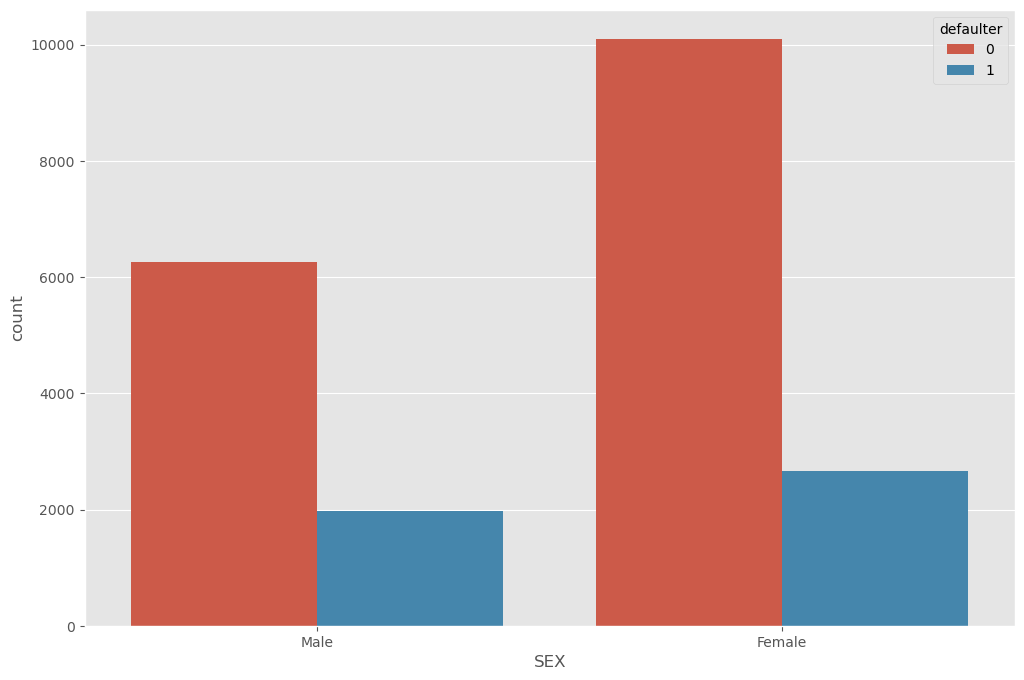

In [16]:
sns.countplot(x=df['SEX'],hue=df['defaulter'])
plt.xticks(ticks=[0,1],labels=['Male','Female'])
plt.show

    > Dapat kita lihat banyaknya jenis kelamin perumpuan yang dinyatakan default
    > Pemegang kartu kredit lebih banyak perempuan dibandingkan laki-laki

In [18]:
df['SEX'].value_counts()

SEX
2    12759
1     8241
Name: count, dtype: int64

In [19]:
df['EDUCATION'].value_counts()

EDUCATION
2    9789
1    7415
3    3467
5     200
4      85
6      34
0      10
Name: count, dtype: int64

In [20]:
fil = (df['EDUCATION'] == 5) | (df['EDUCATION'] == 6) | (df['EDUCATION'] == 0)
df.loc[fil, 'EDUCATION'] = 4
df['EDUCATION'].value_counts()

EDUCATION
2    9789
1    7415
3    3467
4     329
Name: count, dtype: int64

In [21]:
# Marriage
df['MARRIAGE'].value_counts()

MARRIAGE
2    11184
1     9561
3      219
0       36
Name: count, dtype: int64

In [22]:
fil = df['MARRIAGE'] == 0
df.loc[fil, 'MARRIAGE'] = 3
df['MARRIAGE'].value_counts()

MARRIAGE
2    11184
1     9561
3      255
Name: count, dtype: int64

# Plotting our categorical features
Saya akan membuat kerangka data baru untuk semua fitur kategori untuk visualisasi yang lebih baik

In [24]:
categorical_features = ['SEX', 'EDUCATION', 'MARRIAGE']

In [25]:
df_cat = df[categorical_features]
df_cat['defaulter'] = df['defaulter']

In [26]:
df_cat.head()

,SEX,EDUCATION,MARRIAGE,defaulter
0,2,2,2,0
1,2,1,2,0
2,2,2,1,0
3,2,2,2,1
4,1,3,1,0


In [27]:
df_cat.replace({'SEX': {1 : 'MALE', 2 : 'FEMALE'}, 'EDUCATION' : {1 : 'graduate school', 2 : 'university', 3 : 'high school', 4 : 'others'}, 'MARRIAGE' : {1 : 'married', 2 : 'single', 3 : 'others'}}, inplace = True)

In [28]:
df_cat.head()

,SEX,EDUCATION,MARRIAGE,defaulter
0,FEMALE,university,single,0
1,FEMALE,graduate school,single,0
2,FEMALE,university,married,0
3,FEMALE,university,single,1
4,MALE,high school,married,0


In [29]:
def cat_plot(col):
    
    inter=df.groupby(col)['defaulter'].mean()
    
    plt.subplot(1,2,1)
    sns.countplot(x=col,data=df,order=inter.index);
    
    plt.subplot(1,2,2)
    plt.pie(inter,labels=inter.index,autopct='%0.1f%%',radius=1.2);

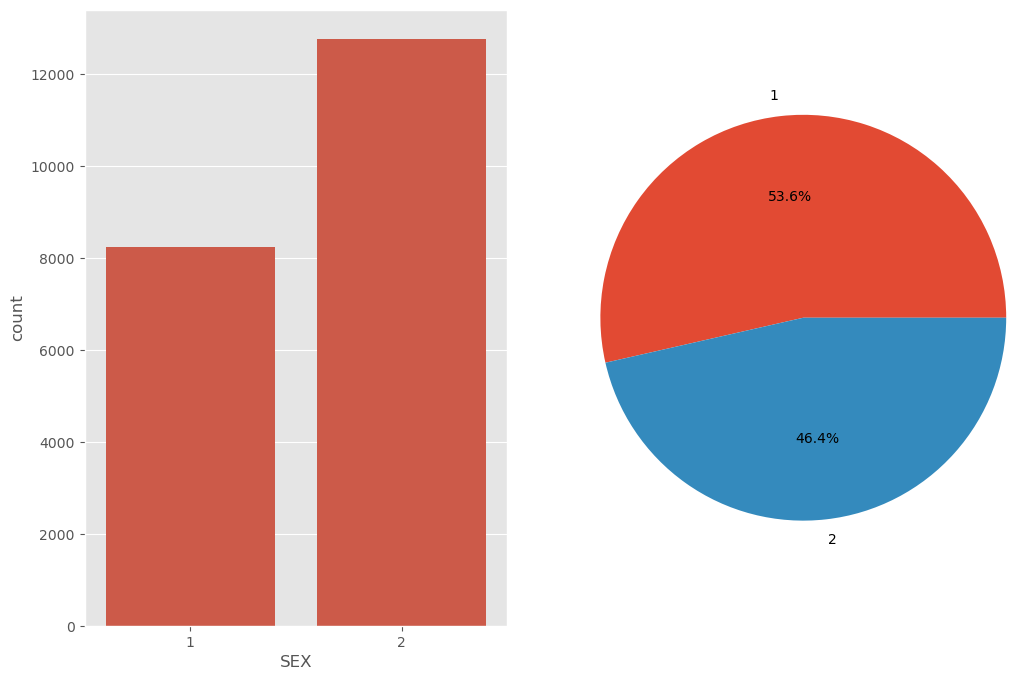

In [30]:
cat_plot('SEX')

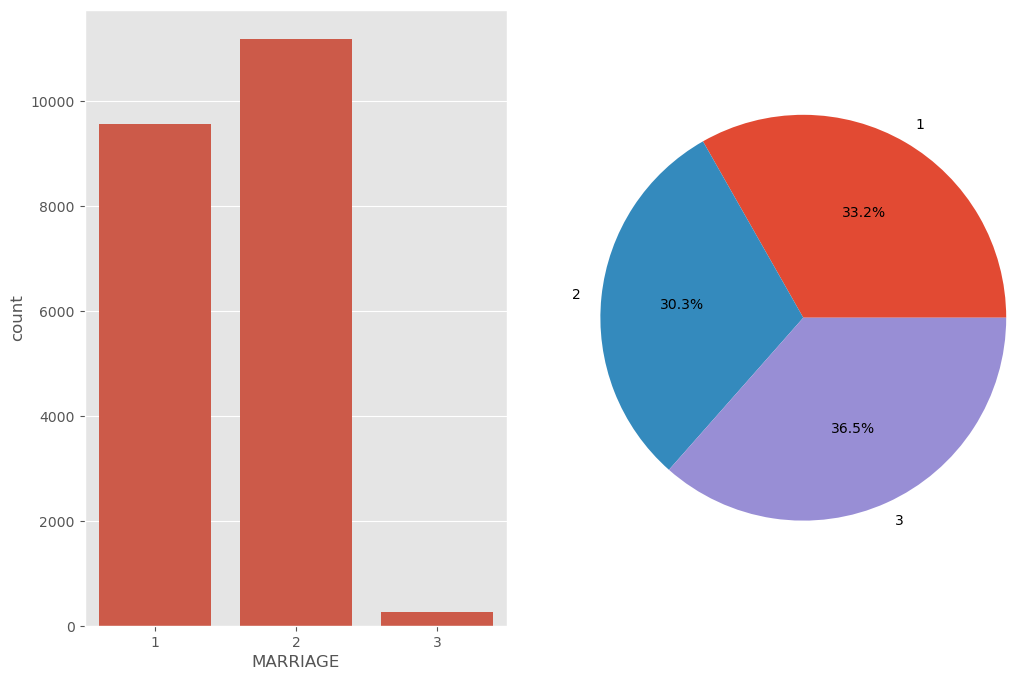

In [31]:
cat_plot('MARRIAGE')

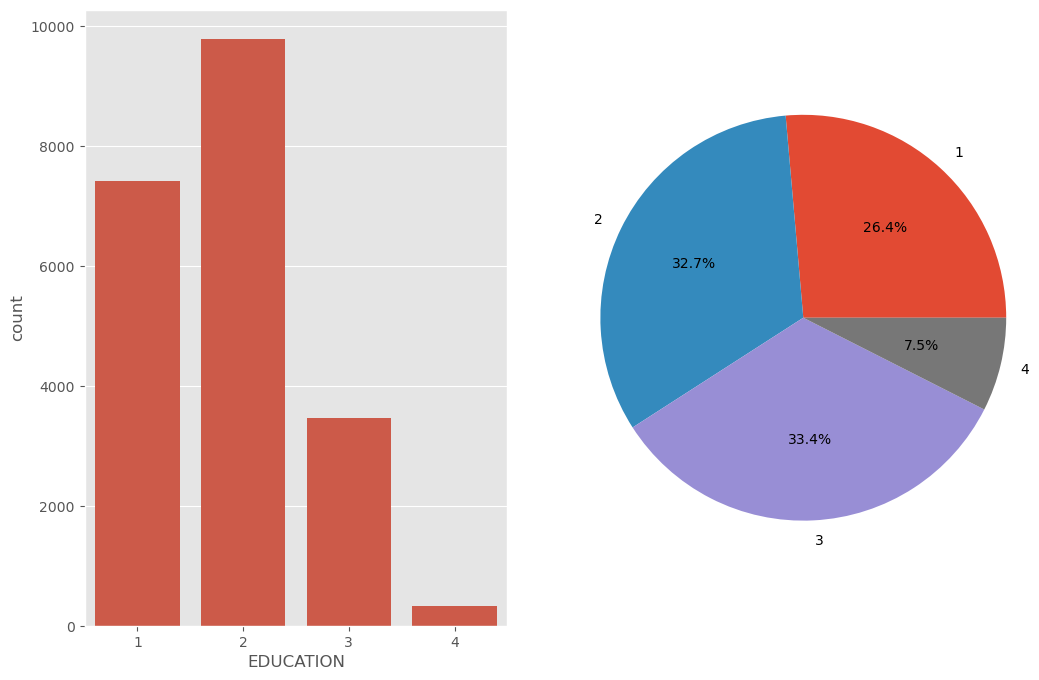

In [32]:
cat_plot('EDUCATION')

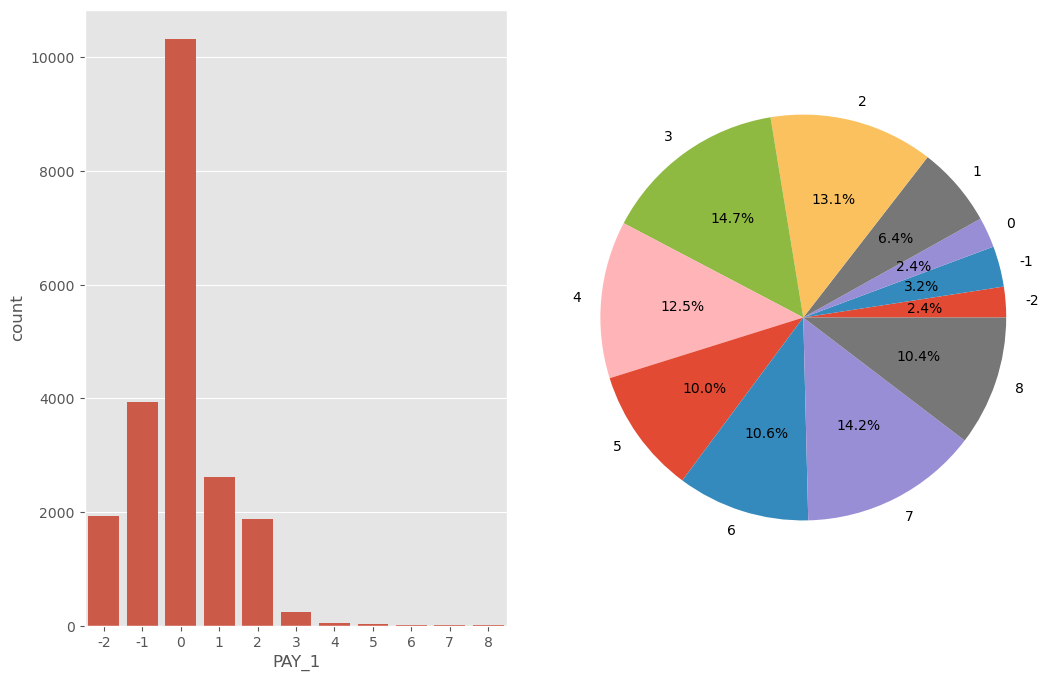

In [33]:
cat_plot('PAY_1')

# Numerical Features

**LIMIT BALANCE**

In [35]:
df['LIMIT_BAL'].describe()

count     21000.000000
mean     167214.746667
std      128965.188482
min       10000.000000
25%       50000.000000
50%      140000.000000
75%      240000.000000
max      800000.000000
Name: LIMIT_BAL, dtype: float64

<Axes: xlabel='defaulter', ylabel='LIMIT_BAL'>

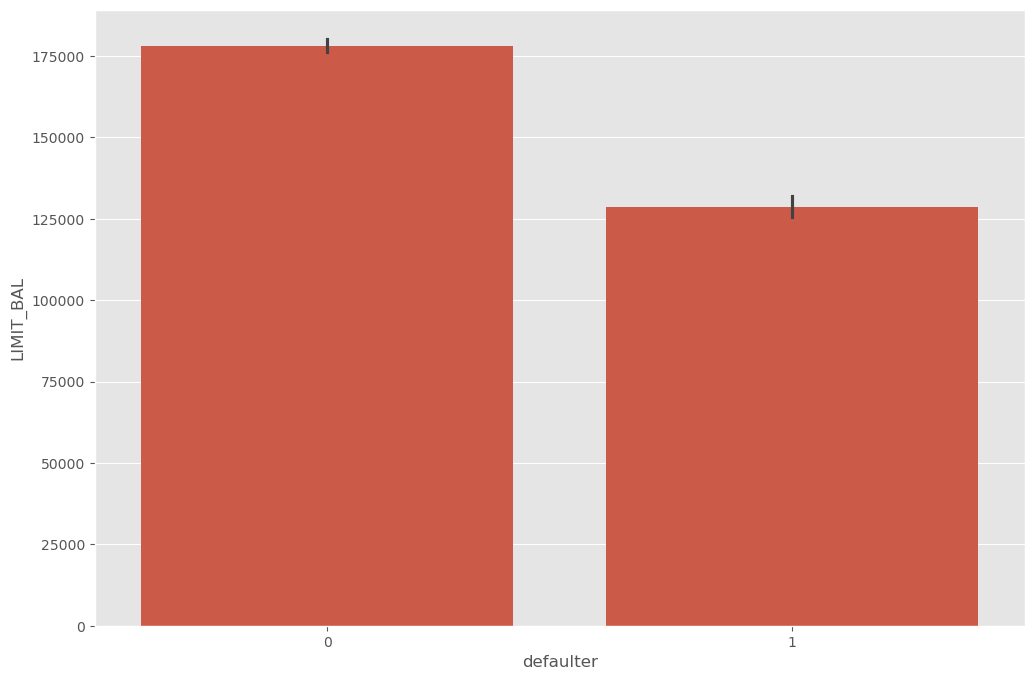

In [36]:
sns.barplot(x='defaulter', y='LIMIT_BAL', data=df)

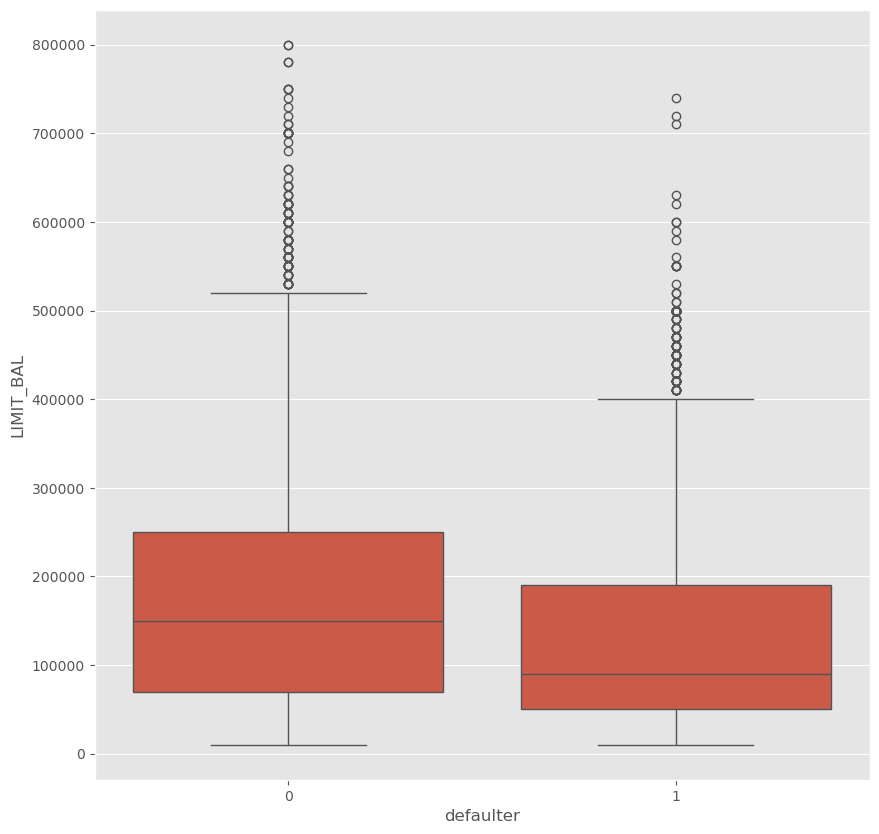

In [37]:
plt.figure(figsize=(10,10))
ax = sns.boxplot(x="defaulter", y="LIMIT_BAL", data= df)

In [38]:
#renaming columns according to the dataset description for better understanding

# Renaming Payment columns
df.rename(columns={'PAY_1':'PAY_SEPT','PAY_2':'PAY_AUG','PAY_3':'PAY_JUL','PAY_4':'PAY_JUN','PAY_5':'PAY_MAY','PAY_6':'PAY_APR'},inplace=True)
# Renaming Bill Amount Columns
df.rename(columns={'BILL_AMT1':'BILL_AMT_SEPT','BILL_AMT2':'BILL_AMT_AUG','BILL_AMT3':'BILL_AMT_JUL','BILL_AMT4':'BILL_AMT_JUN','BILL_AMT5':'BILL_AMT_MAY','BILL_AMT6':'BILL_AMT_APR'}, inplace = True)
# Renaming total Amount for particular months columns
df.rename(columns={'PAY_AMT1':'PAY_AMT_SEPT','PAY_AMT2':'PAY_AMT_AUG','PAY_AMT3':'PAY_AMT_JUL','PAY_AMT4':'PAY_AMT_JUN','PAY_AMT5':'PAY_AMT_MAY','PAY_AMT6':'PAY_AMT_APR'},inplace=True)

In [39]:
df.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_SEPT',
       'PAY_AUG', 'PAY_JUL', 'PAY_JUN', 'PAY_MAY', 'PAY_APR', 'BILL_AMT_SEPT',
       'BILL_AMT_AUG', 'BILL_AMT_JUL', 'BILL_AMT_JUN', 'BILL_AMT_MAY',
       'BILL_AMT_APR', 'PAY_AMT_SEPT', 'PAY_AMT_AUG', 'PAY_AMT_JUL',
       'PAY_AMT_JUN', 'PAY_AMT_MAY', 'PAY_AMT_APR', 'defaulter'],
      dtype='object')

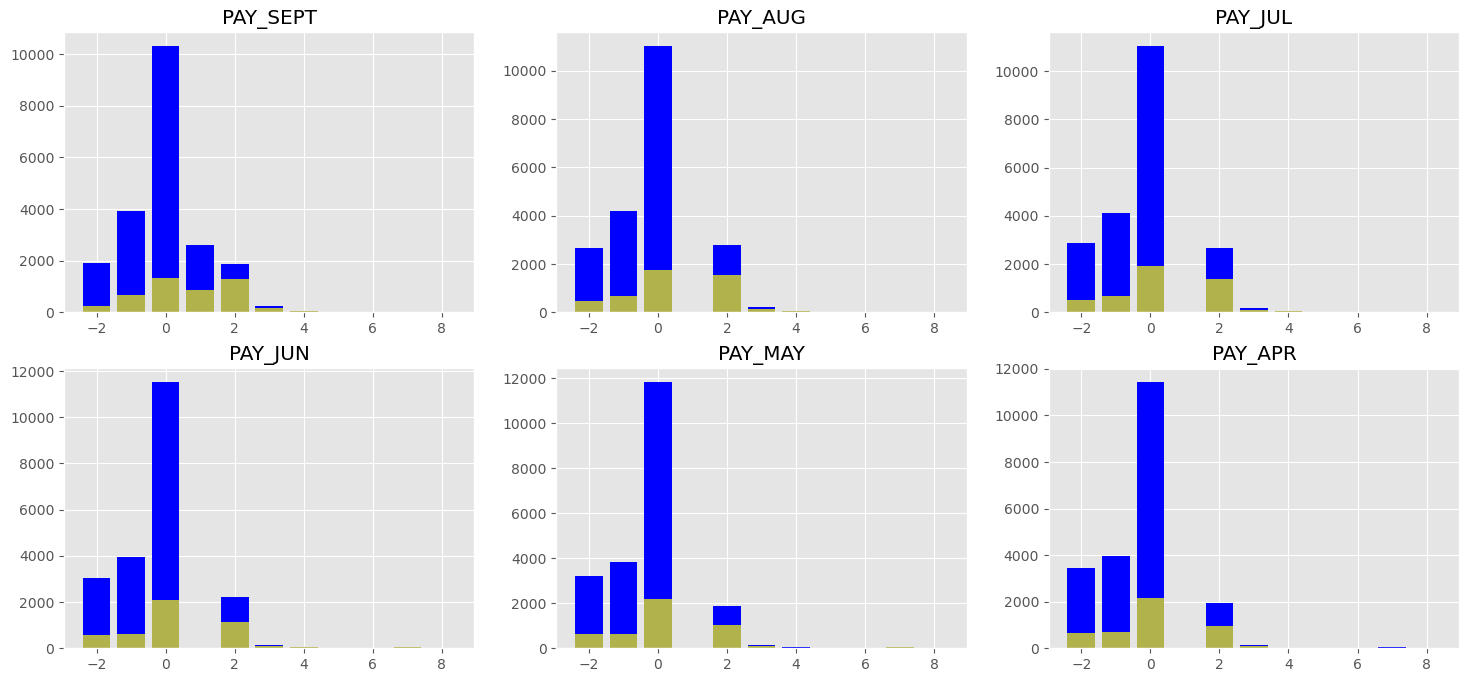

In [40]:
pay_status_columns = ['PAY_SEPT','PAY_AUG', 'PAY_JUL', 'PAY_JUN', 'PAY_MAY', 'PAY_APR']
 
figure, ax = plt.subplots(2,3)
figure.set_size_inches(18,8)


for i in range(len(pay_status_columns)):
    row,col = int(i/3), i%3
    d  = df[pay_status_columns[i]].value_counts()
    x = df[pay_status_columns[i]][(df['defaulter']==1)].value_counts()
    ax[row,col].bar(d.index, d, align='center', color='blue')
    ax[row,col].bar(x.index, x, align='center', color='yellow', alpha=0.7)
    ax[row,col].set_title(pay_status_columns[i])
plt.show()

# Age 

In [42]:
# plt.figure(figsize=(18,5))
# age=df['AGE'].value_counts().reset_index()
# sns.barplot(x='index',y='AGE',data=age,orient='v')
# plt.xlabel("Age")
# plt.ylabel("Count")
# plt.show()

<Axes: xlabel='defaulter', ylabel='AGE'>

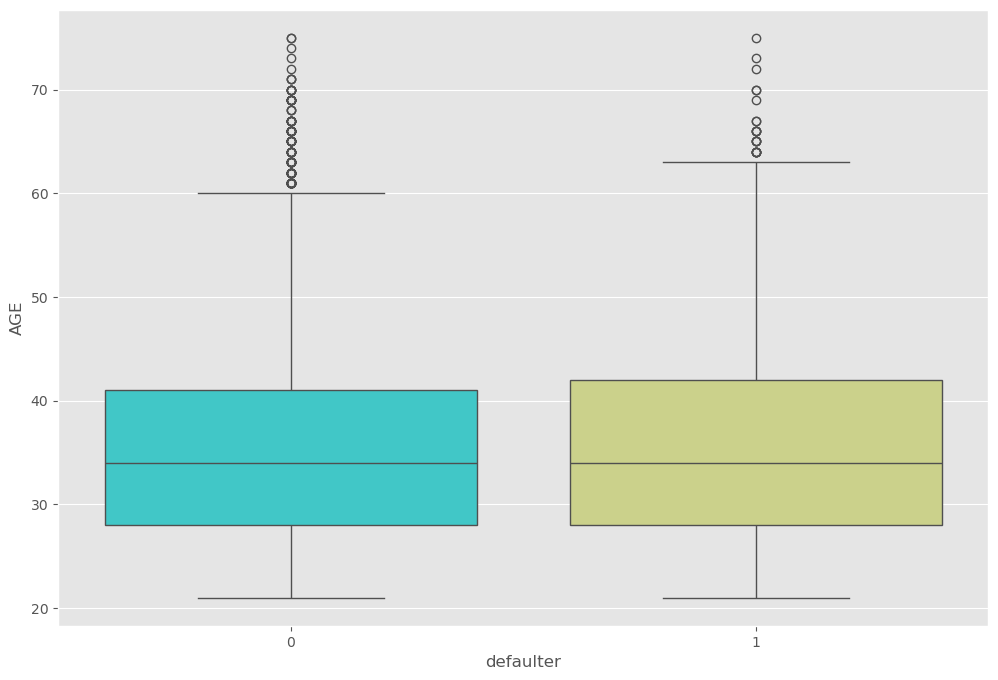

In [43]:
sns.boxplot(x='defaulter',y='AGE',data=df,palette='rainbow')

<Axes: xlabel='defaulter', ylabel='AGE'>

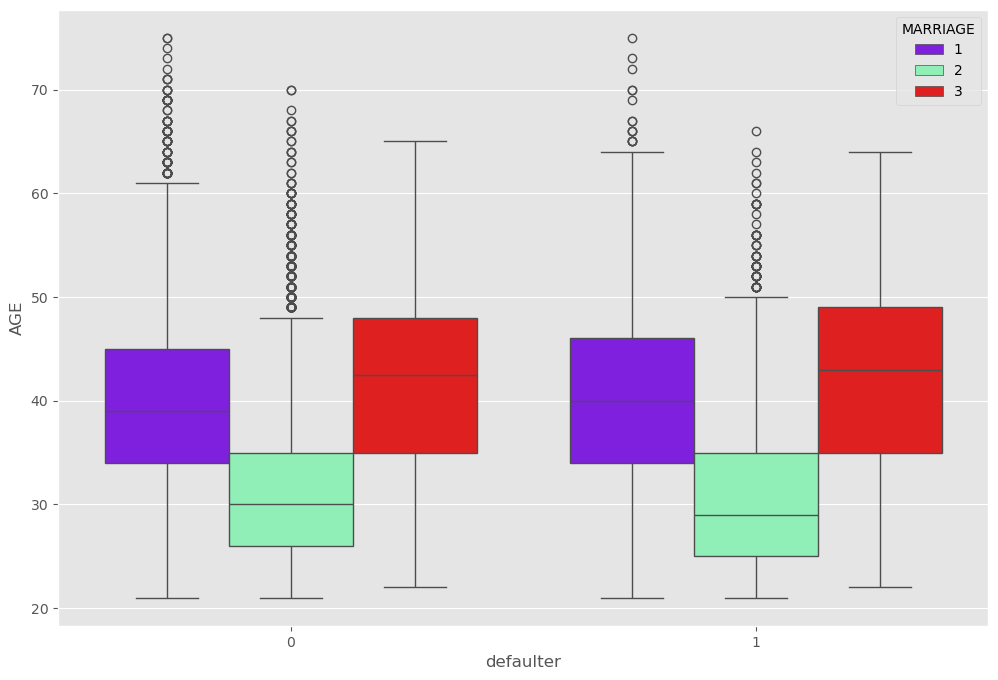

In [44]:
sns.boxplot(x='defaulter',hue='MARRIAGE', y='AGE',data=df,palette="rainbow")

<Axes: xlabel='defaulter', ylabel='AGE'>

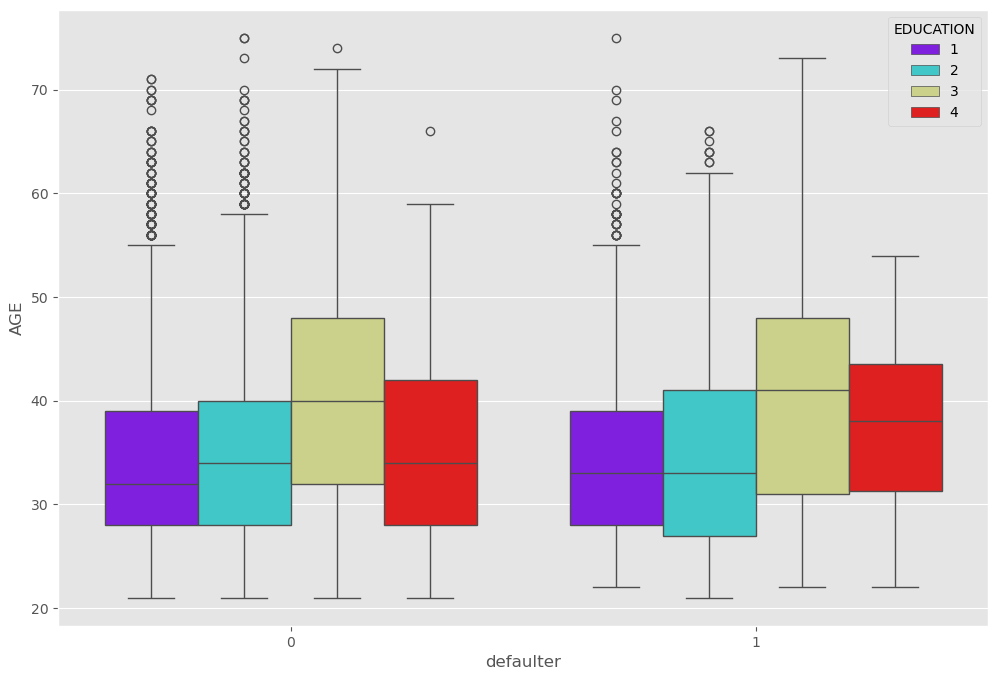

In [45]:
sns.boxplot(x='defaulter',hue='EDUCATION', y='AGE',data=df,palette="rainbow" )

# Correlation between Features

In [47]:
df.corr(method='spearman').abs()['defaulter'].sort_values(ascending=False)

defaulter        1.000000
PAY_SEPT         0.293198
PAY_AUG          0.217887
PAY_JUL          0.194793
LIMIT_BAL        0.176363
PAY_JUN          0.175840
PAY_AMT_SEPT     0.166117
PAY_MAY          0.162191
PAY_AMT_AUG      0.154899
PAY_AMT_JUL      0.147867
PAY_APR          0.142768
PAY_AMT_JUN      0.133533
PAY_AMT_APR      0.127336
PAY_AMT_MAY      0.122328
EDUCATION        0.038159
SEX              0.037634
BILL_AMT_SEPT    0.033137
BILL_AMT_AUG     0.023742
MARRIAGE         0.022250
BILL_AMT_JUL     0.020260
BILL_AMT_JUN     0.017392
BILL_AMT_MAY     0.013964
BILL_AMT_APR     0.007531
AGE              0.001419
Name: defaulter, dtype: float64

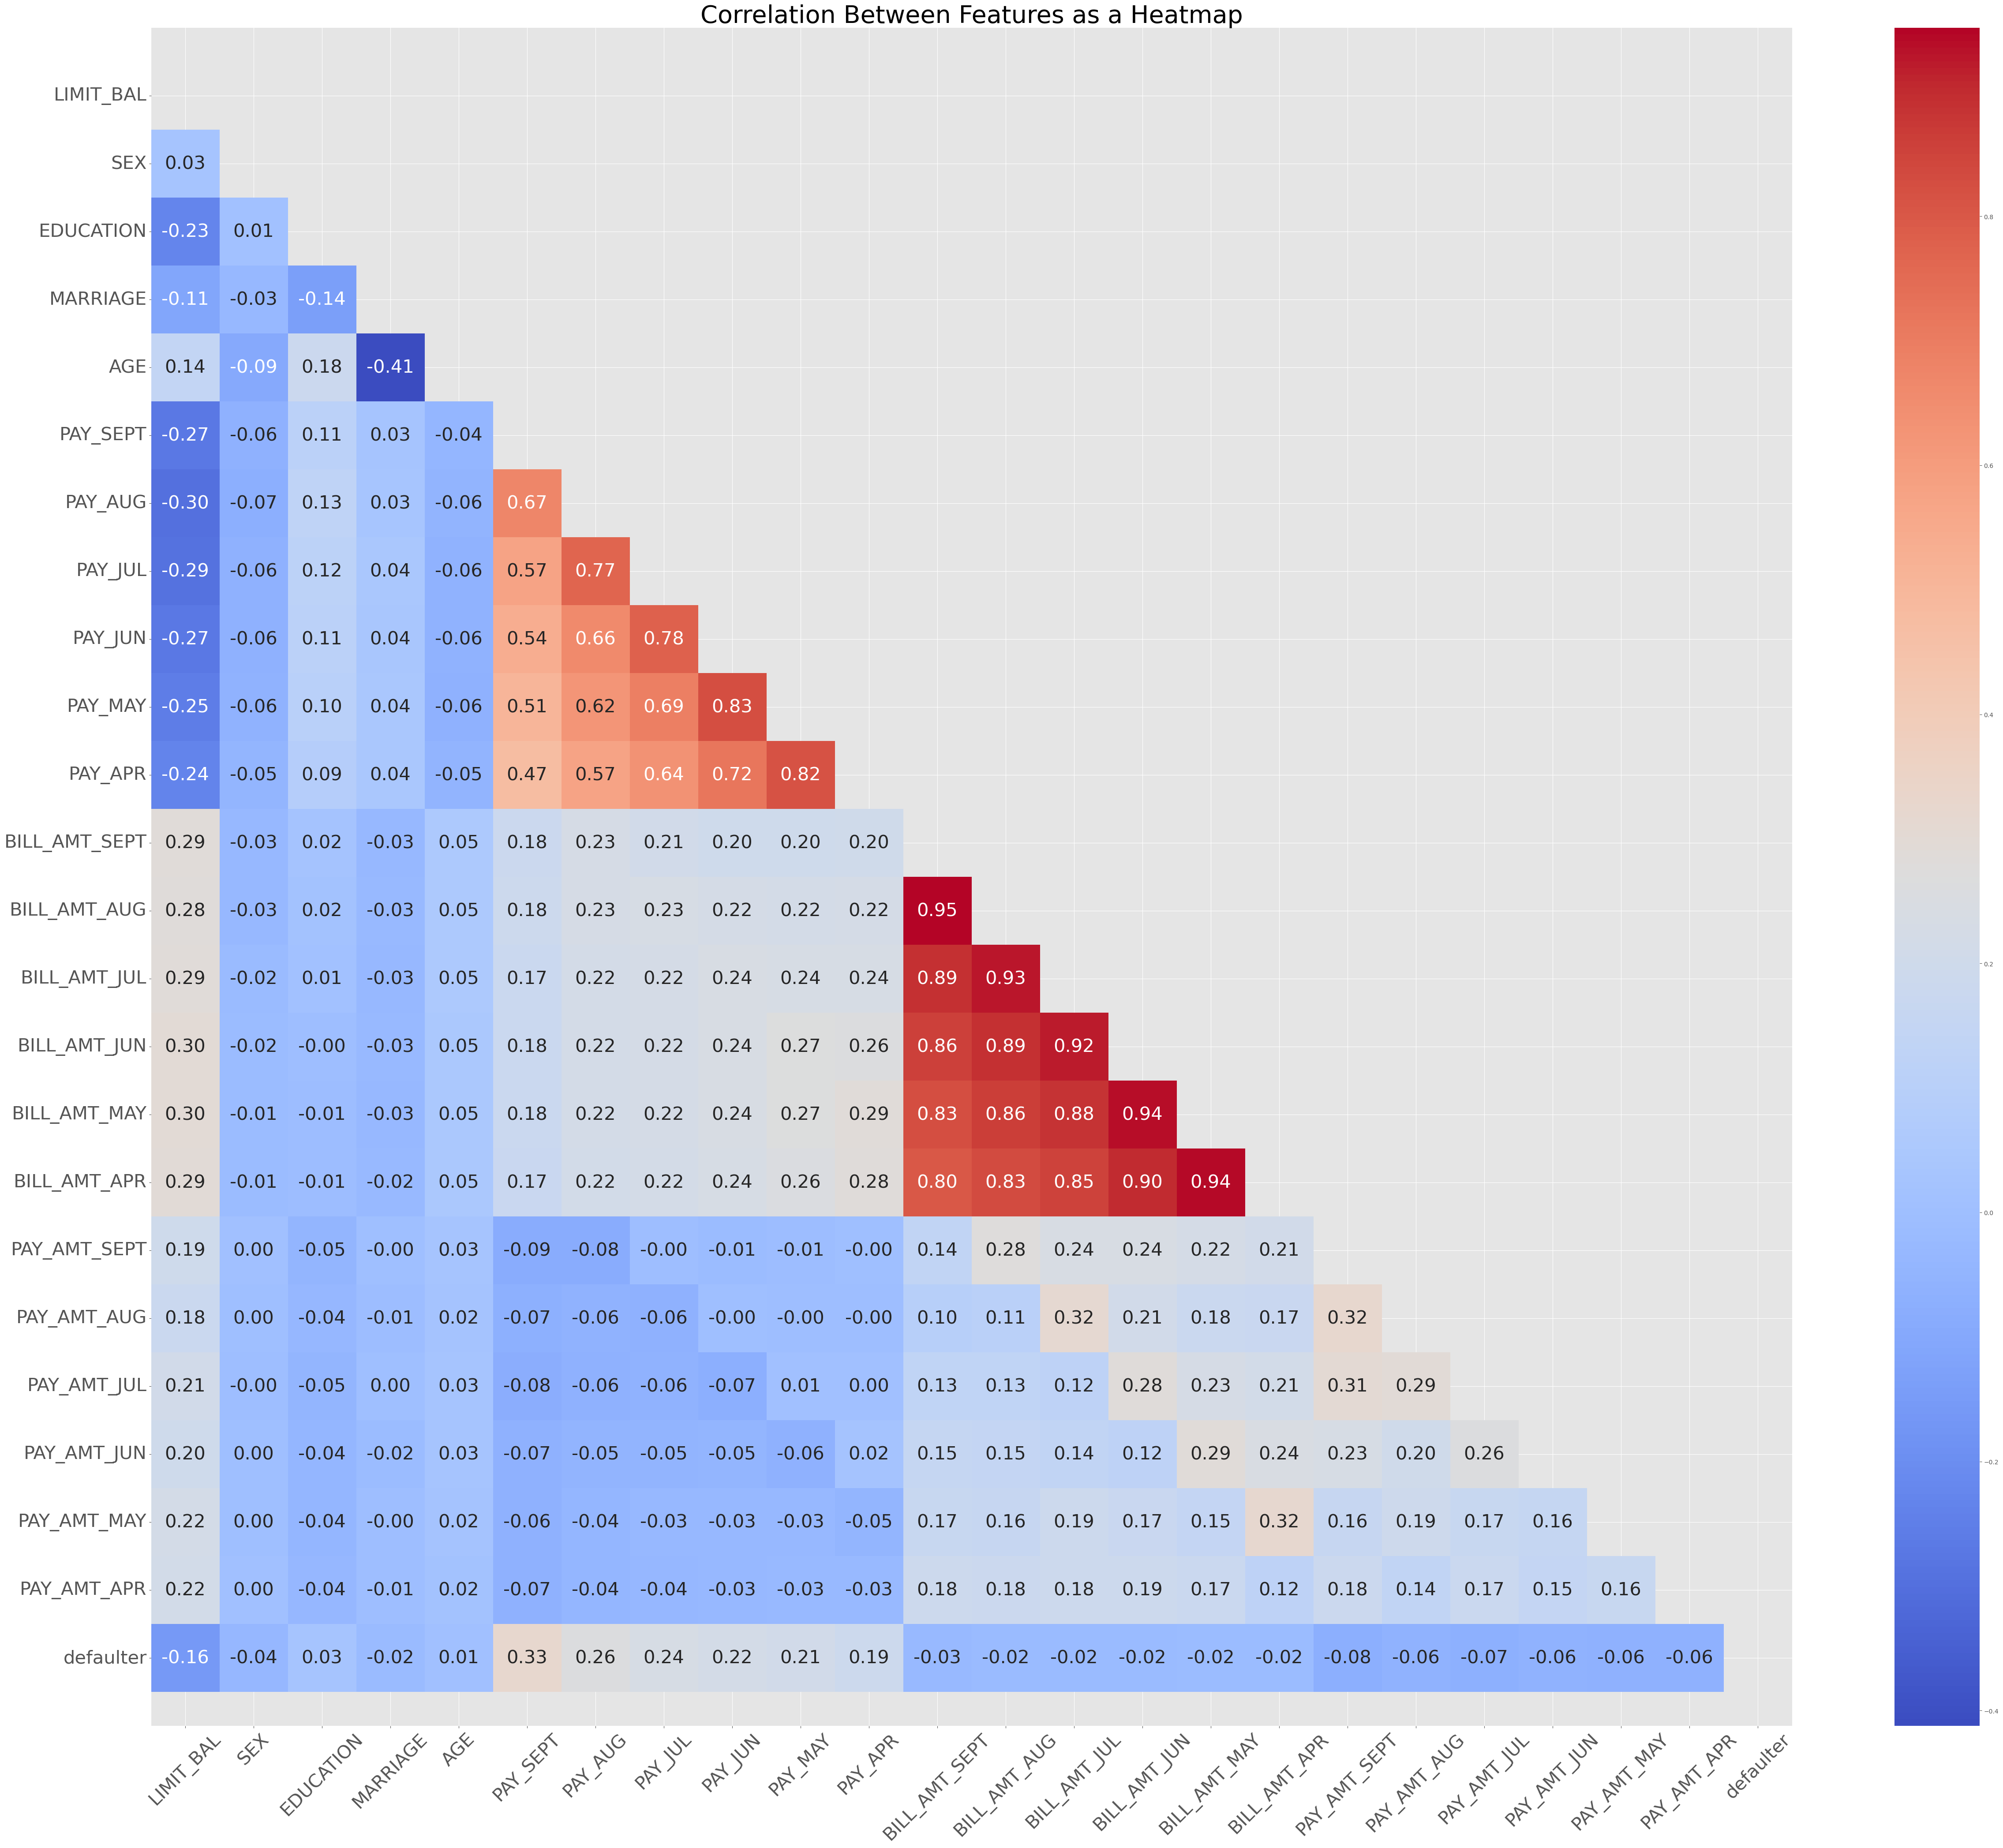

In [49]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Hitung korelasi hanya untuk kolom 0 sampai 23 (total 24 kolom)
corr = df.iloc[:, :24].corr()

# Generate mask untuk segitiga atas (upper triangle)
mask = np.zeros_like(corr, dtype=bool)  # <-- Perbaikan di sini
mask[np.triu_indices_from(mask)] = True

# Setup ukuran figure heatmap
fig, ax = plt.subplots(figsize=(60, 50))

# Plot heatmap
g = sns.heatmap(
    data=corr,
    annot=True,
    ax=ax,
    cmap='coolwarm',
    cbar=True,
    fmt='.2f',
    mask=mask,  # hanya tampilkan segitiga bawah
    annot_kws={"size": 30}  # ukuran teks angka
)

# Hindari heatmap cutoff
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

# Ukuran label sumbu
ax.tick_params(labelsize=30)

# Rotasi label
ax.set_yticklabels(g.get_yticklabels(), rotation=0)
ax.set_xticklabels(g.get_xticklabels(), rotation=45)

# Judul
plt.title('Correlation Between Features as a Heatmap', size=40)

# Tampilkan plot
plt.show()


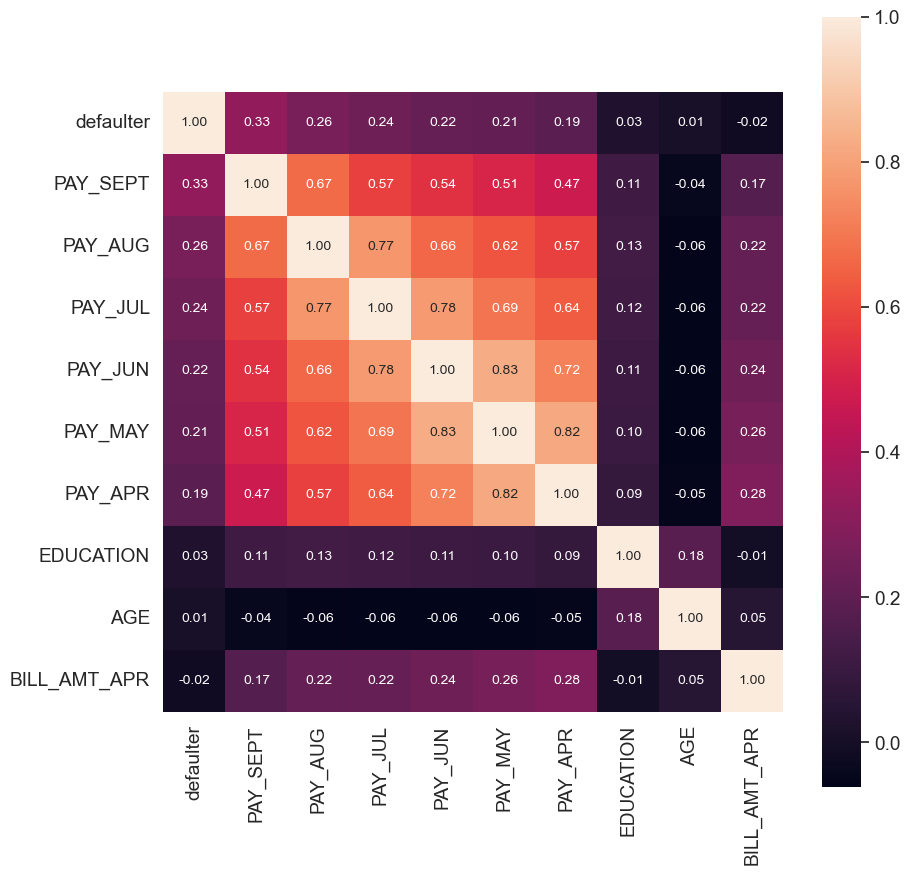

In [51]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
corrmat = df.corr()
cols = corrmat.nlargest(k, 'defaulter')['defaulter'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
plt.subplots(figsize=(10,10))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

<Axes: title={'center': 'Correlation with Default'}>

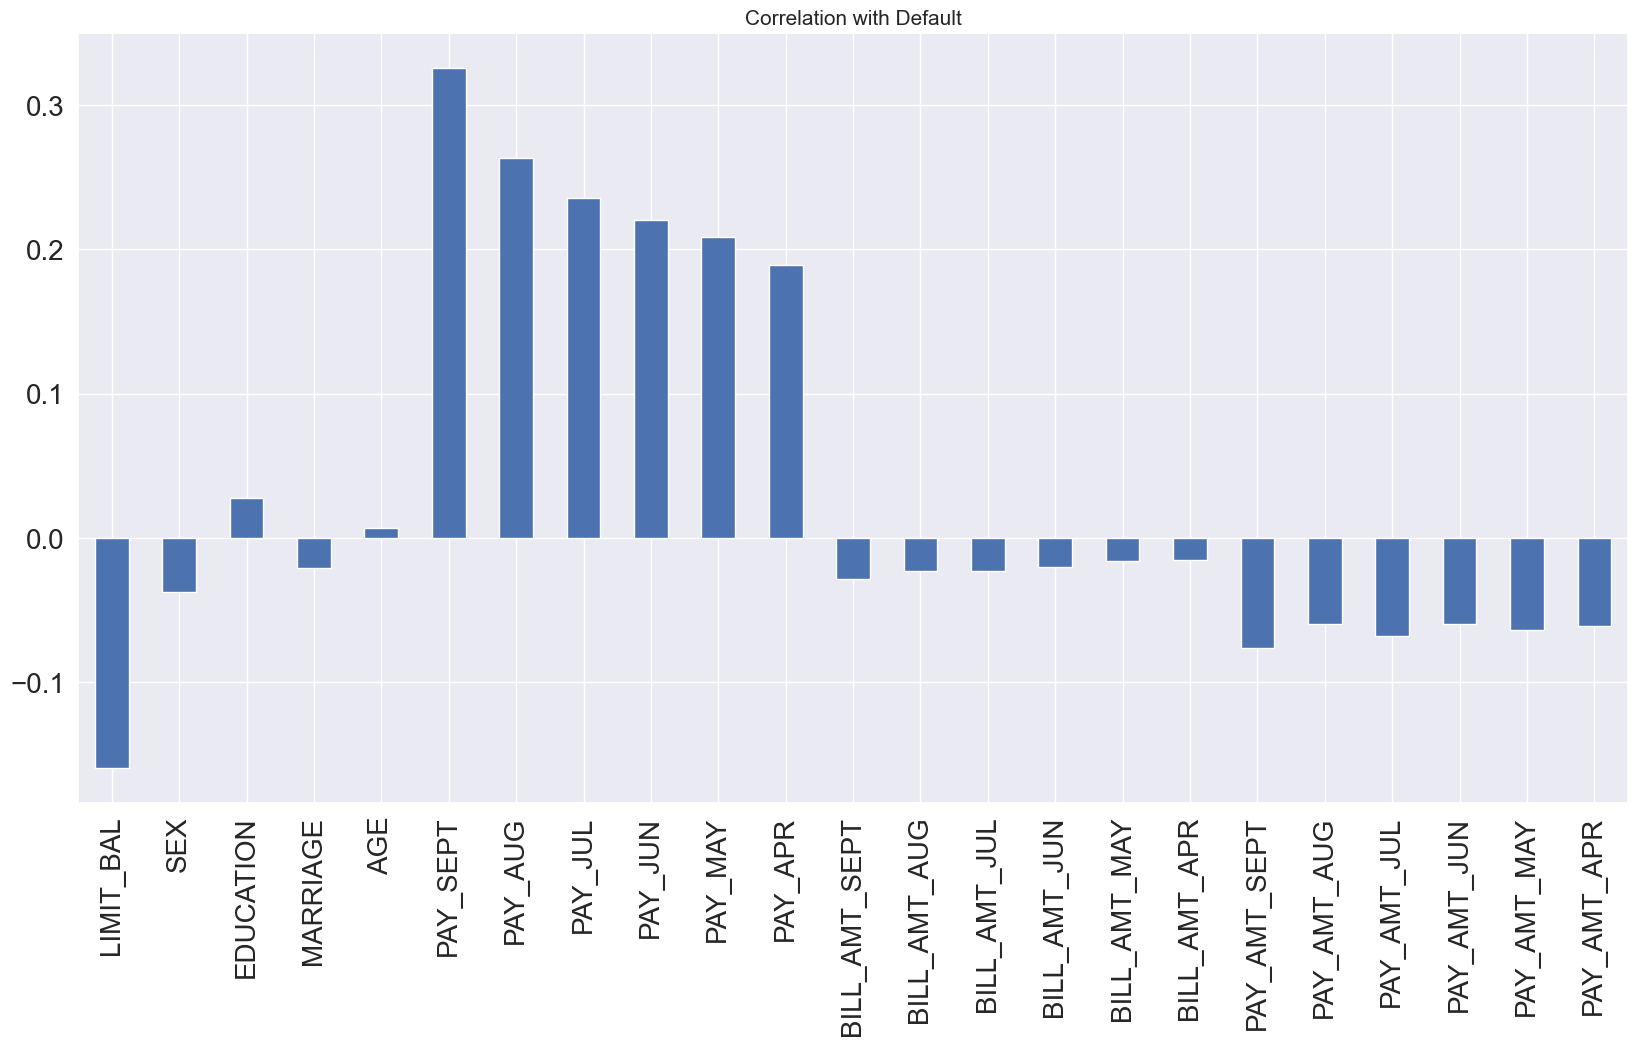

In [52]:
X = df.drop(['defaulter'],axis=1)
X.corrwith(df['defaulter']).plot.bar(figsize = (20, 10), title = "Correlation with Default", 
                                        fontsize = 20,rot = 90, grid = True)

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21000 entries, 0 to 20999
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   LIMIT_BAL      21000 non-null  int64
 1   SEX            21000 non-null  int64
 2   EDUCATION      21000 non-null  int64
 3   MARRIAGE       21000 non-null  int64
 4   AGE            21000 non-null  int64
 5   PAY_SEPT       21000 non-null  int64
 6   PAY_AUG        21000 non-null  int64
 7   PAY_JUL        21000 non-null  int64
 8   PAY_JUN        21000 non-null  int64
 9   PAY_MAY        21000 non-null  int64
 10  PAY_APR        21000 non-null  int64
 11  BILL_AMT_SEPT  21000 non-null  int64
 12  BILL_AMT_AUG   21000 non-null  int64
 13  BILL_AMT_JUL   21000 non-null  int64
 14  BILL_AMT_JUN   21000 non-null  int64
 15  BILL_AMT_MAY   21000 non-null  int64
 16  BILL_AMT_APR   21000 non-null  int64
 17  PAY_AMT_SEPT   21000 non-null  int64
 18  PAY_AMT_AUG    21000 non-null  int64
 19  PAY_

# Handling Imbalance & Outlier 

# Oversampling

In [57]:
logger.info('HANDALING IMBALENCED DATA - OVER SAMPLEING STARTS!')

In [59]:
# pilih Fitur
X = df.drop(columns=['defaulter'])
y = df['defaulter']

In [61]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [63]:
# menggabungkan X dan y train 
X_y_train = X_train.join(y_train)

# menggabungkan X dan y test
X_y_test = X_test.join(y_test)

In [65]:
y_train.value_counts()

defaulter
0    13118
1     3682
Name: count, dtype: int64

In [67]:
X_y_train.columns


Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_SEPT',
       'PAY_AUG', 'PAY_JUL', 'PAY_JUN', 'PAY_MAY', 'PAY_APR', 'BILL_AMT_SEPT',
       'BILL_AMT_AUG', 'BILL_AMT_JUL', 'BILL_AMT_JUN', 'BILL_AMT_MAY',
       'BILL_AMT_APR', 'PAY_AMT_SEPT', 'PAY_AMT_AUG', 'PAY_AMT_JUL',
       'PAY_AMT_JUN', 'PAY_AMT_MAY', 'PAY_AMT_APR', 'defaulter'],
      dtype='object')

In [69]:
y_train.value_counts()

defaulter
0    13118
1     3682
Name: count, dtype: int64

In [71]:
# handle outlier
nums = ['LIMIT_BAL']
print(f'Jumlah baris sebelum memfilter outlier: {len(X_y_train)}')

filtered_entries = np.array([True] * len(X_y_train))
for col in nums:
    Q1 = X_y_train[col].quantile(0.25)
    Q3 = X_y_train[col].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (IQR * 1.5)
    high_limit = Q3 + (IQR * 1.5)

    filtered_entries = ((X_y_train[col] >= low_limit) & (X_y_train[col] <= high_limit)) & filtered_entries
    
X_y_train = X_y_train[filtered_entries]

print(f'Jumlah baris setelah memfilter outlier: {len(X_y_train)}')

Jumlah baris sebelum memfilter outlier: 16800
Jumlah baris setelah memfilter outlier: 16706


In [73]:
X_train = X_y_train.drop(columns='defaulter')
y_train = X_y_train['defaulter']

In [75]:
y_train.value_counts()

defaulter
0    13038
1     3668
Name: count, dtype: int64

In [77]:
# handle class imbalance dengan SMOTE
sm = over_sampling.SMOTE(random_state=42)
X_sm, y_sm = sm.fit_resample(X_train, y_train)

In [78]:
y_sm.value_counts()

defaulter
0    13038
1    13038
Name: count, dtype: int64

In [79]:
logger.info('HANDALING IMBALENCED DATA - OVER SAMPLEING ENDS!')

In [83]:
logger.info('HANDALING IMBALENCED DATA ENDS!')

# Scaling Data

In [86]:
scaler = StandardScaler()

In [88]:
X_train_scaled = scaler.fit_transform(X_train)

In [90]:
logger.info('DATA PREPARING FOR MODELING ENDS!')

# Model Building

# 1. Logistic Regression

In [94]:
logger.info('MODELING STARTS!')

In [96]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_auc_score, roc_curve

def helper(model,X_train,y_train,X_test,y_test):
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)

    train_acc = accuracy_score(train_pred, y_train)
    test_acc = accuracy_score(test_pred, y_test)
    prec = precision_score(y_test, test_pred)
    recc = recall_score(y_test, test_pred)
    f1 = f1_score(y_test, test_pred)
    train_roc_auc = roc_auc_score(y_train, train_pred)
    test_roc_auc = roc_auc_score(y_test, test_pred)

    acc_matrices = {'Train accuracy':train_acc,'Test accuracy':test_acc,'Precision':prec,'Recall':recc,'F1 Score':f1, 'Train ROC AUC': train_roc_auc, 'Test ROC AUC': test_roc_auc}

    print('\nTraining Accuracy Score: ',train_acc)
    print('Testing Accuracy Score: ',test_acc)
    print('Precision on test data: ',prec)
    print('Recall on test data: ',recc)
    print('F1 score on test data: ',f1)
    print('Train ROC AUC score: ', train_roc_auc)
    print('Test ROC AUC score: ', test_roc_auc)
    print('\n========================================================')
    print('Classification Report on Train data')
    print(classification_report(train_pred, y_train))
    print('\n========================================================')
    print('Classification Report on Test data')
    print(classification_report(test_pred, y_test))

    print('\n========================================================')
      # Plotting Confusion Matrix and ROC curve
    f,ax =  plt.subplots(1,2,figsize=(14,6))
    #plt.figure(figsize=(6,4))
    ConfMatrix = confusion_matrix(test_pred, y_test)
    sns.heatmap(ConfMatrix,annot=True, cmap='YlGnBu', fmt="d", 
                xticklabels = ['Non-default', 'Default'], 
                yticklabels = ['Non-default', 'Default'],linewidths=.5,ax = ax[0])
    ax[0].set_ylabel('True label')
    ax[0].set_xlabel('Predicted label')
    ax[0].set_title('Confusion Matrix')

    global fpr,tpr,thresholds
    fpr,tpr,thresholds = roc_curve(test_pred, y_test)
    ax[1].plot(fpr,tpr,color = 'blue')
    ax[1].plot(fpr,fpr,color = 'r')
    ax[1].set_ylabel('TPR')
    ax[1].set_xlabel('FPR')
    ax[1].set_title('ROC Curve')
    plt.show()
    return acc_matrices

In [98]:
logger.info('MODEL - LOGISTIC REGRESSION STARTS!')

In [100]:
# Membuat model Logistik Regresi dengan parameter tertentu
LogR = LogisticRegression(penalty='l2', C=1.0, solver='lbfgs', max_iter=2000)


In [102]:
# Melatih model pada data training
LogR.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=2000)

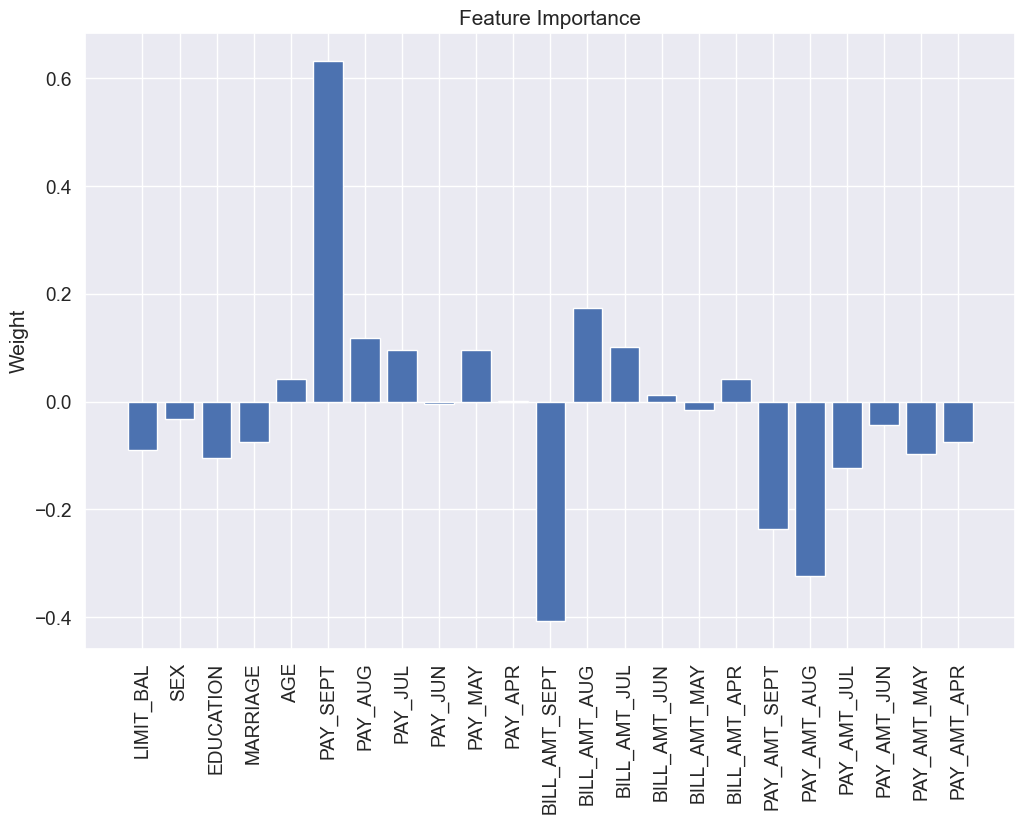

In [103]:
# Menghitung feature importance
features = X.columns
importances = LogR.coef_[0]

# Membuat plot bar untuk feature importance
plt.bar(features, importances)
plt.xticks(rotation=90)
plt.ylabel('Weight')
plt.title('Feature Importance')
plt.show()


Training Accuracy Score:  0.8118640009577397
Testing Accuracy Score:  0.8028571428571428
Precision on test data:  0.6979472140762464
Recall on test data:  0.24714434060228452
F1 score on test data:  0.36503067484662577
Train ROC AUC score:  0.6073219745386483
Test ROC AUC score:  0.6076623772829156

Classification Report on Train data
              precision    recall  f1-score   support

           0       0.97      0.82      0.89     15451
           1       0.24      0.71      0.36      1255

    accuracy                           0.81     16706
   macro avg       0.61      0.76      0.63     16706
weighted avg       0.92      0.81      0.85     16706


Classification Report on Test data
              precision    recall  f1-score   support

           0       0.97      0.81      0.88      3859
           1       0.25      0.70      0.37       341

    accuracy                           0.80      4200
   macro avg       0.61      0.76      0.62      4200
weighted avg       0.91    

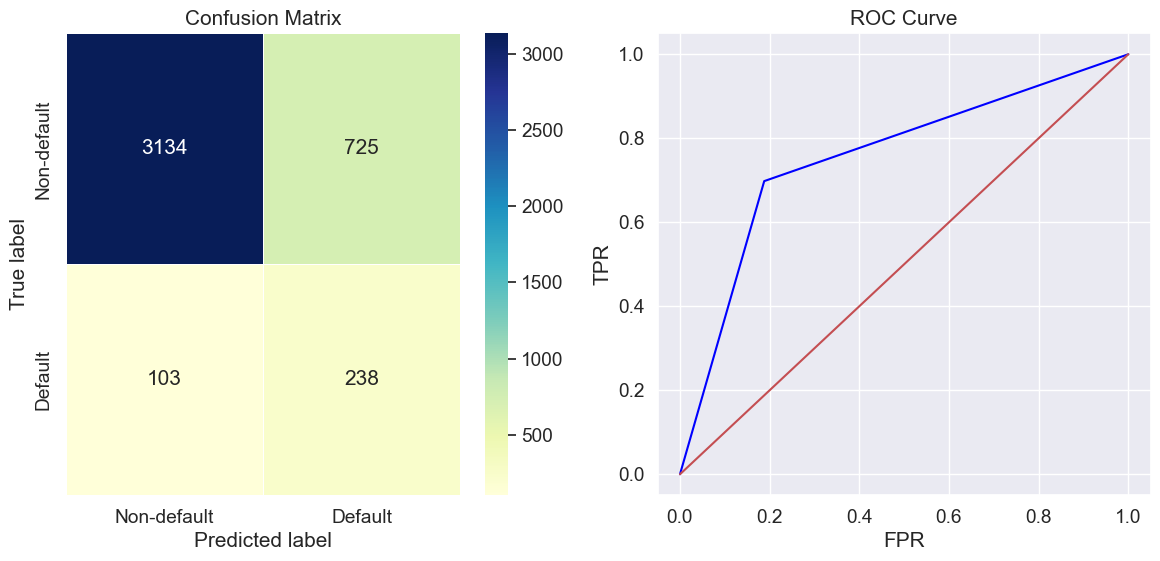

{'Train accuracy': 0.8118640009577397,
 'Test accuracy': 0.8028571428571428,
 'Precision': 0.6979472140762464,
 'Recall': 0.24714434060228452,
 'F1 Score': 0.36503067484662577,
 'Train ROC AUC': 0.6073219745386483,
 'Test ROC AUC': 0.6076623772829156}

In [105]:
# Mengevaluasi model pada data training dan testing
X_test_scaled = scaler.transform(X_test)
helper(LogR, X_train_scaled, y_train, X_test_scaled, y_test)

In [106]:
print("Feature importance:")
for feature, weight in zip(X.columns, LogR.coef_[0]):
    print(f"{feature}: {weight}")

Feature importance:
LIMIT_BAL: -0.0906640884830746
SEX: -0.033000142397486276
EDUCATION: -0.10541743642743867
MARRIAGE: -0.07464536183126583
AGE: 0.04246856968068162
PAY_SEPT: 0.632434994536228
PAY_AUG: 0.1183721839356033
PAY_JUL: 0.0963839896979063
PAY_JUN: -0.005325853773411387
PAY_MAY: 0.09519083616596266
PAY_APR: 0.0010504965343226137
BILL_AMT_SEPT: -0.40703201727611465
BILL_AMT_AUG: 0.1733589630143904
BILL_AMT_JUL: 0.10179705549245717
BILL_AMT_JUN: 0.01181393535271542
BILL_AMT_MAY: -0.015124039116300465
BILL_AMT_APR: 0.0416891050779142
PAY_AMT_SEPT: -0.2370965867145331
PAY_AMT_AUG: -0.32476348747942557
PAY_AMT_JUL: -0.12331916698279237
PAY_AMT_JUN: -0.04315513853048657
PAY_AMT_MAY: -0.09687887549895237
PAY_AMT_APR: -0.07531052685154446


In [107]:
logger.info('MODEL - LOGISTIC REGRESSION ENDS!')

# 2. Decision Tree

In [110]:
logger.info('MODEL - DECICION TREE STARTS!')

In [111]:
D_tree = DecisionTreeClassifier(criterion='gini', 
                             max_depth=10, 
                             min_samples_split=5, 
                             min_samples_leaf=5, 
                             class_weight='balanced')

In [112]:
# Melatih model pada data training
D_tree.fit(X_train_scaled, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=10,
                       min_samples_leaf=5, min_samples_split=5)

In [113]:
# Menghitung feature importance
features = X.columns
importances = D_tree.feature_importances_

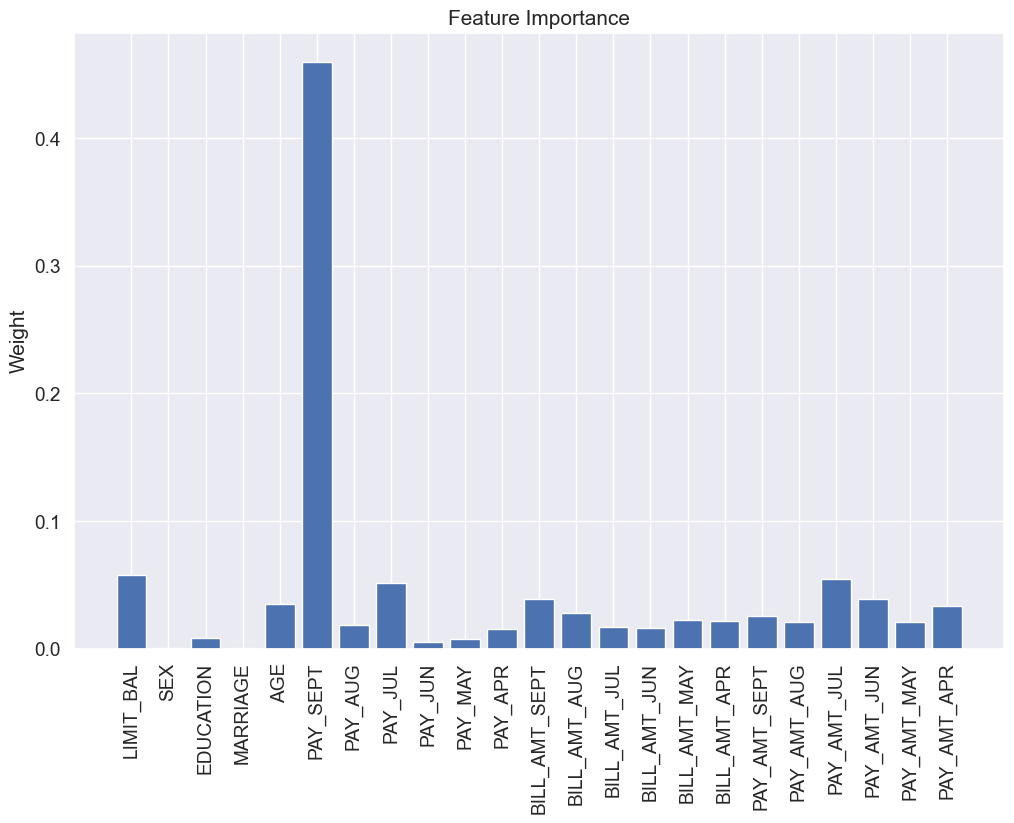

In [114]:
# Membuat plot bar untuk feature importance
plt.bar(features, importances)
plt.xticks(rotation=90)
plt.ylabel('Weight')
plt.title('Feature Importance')
plt.show()


Training Accuracy Score:  0.7829522327307554
Testing Accuracy Score:  0.7180952380952381
Precision on test data:  0.4211277658815132
Recall on test data:  0.612668743509865
F1 score on test data:  0.49915397631133673
Train ROC AUC score:  0.7740503055994533
Test ROC AUC score:  0.6810640597376325

Classification Report on Train data
              precision    recall  f1-score   support

           0       0.79      0.92      0.85     11186
           1       0.76      0.50      0.61      5520

    accuracy                           0.78     16706
   macro avg       0.77      0.71      0.73     16706
weighted avg       0.78      0.78      0.77     16706


Classification Report on Test data
              precision    recall  f1-score   support

           0       0.75      0.87      0.80      2799
           1       0.61      0.42      0.50      1401

    accuracy                           0.72      4200
   macro avg       0.68      0.64      0.65      4200
weighted avg       0.70      

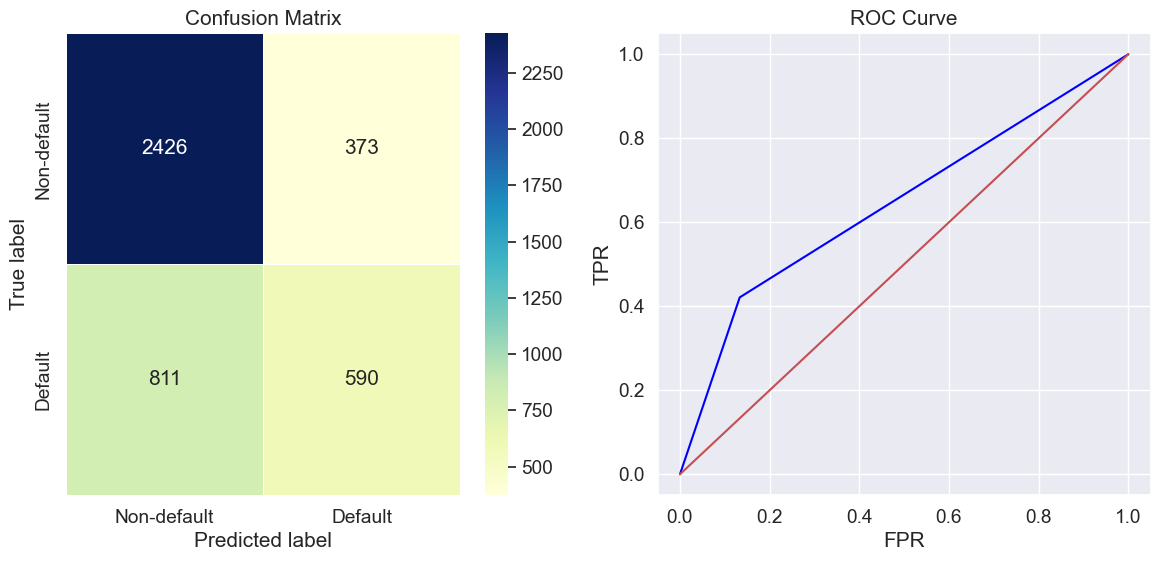

{'Train accuracy': 0.7829522327307554,
 'Test accuracy': 0.7180952380952381,
 'Precision': 0.4211277658815132,
 'Recall': 0.612668743509865,
 'F1 Score': 0.49915397631133673,
 'Train ROC AUC': 0.7740503055994533,
 'Test ROC AUC': 0.6810640597376325}

In [118]:
# Mengevaluasi model pada data training dan testing
X_test_scaled = scaler.transform(X_test)
helper(D_tree, X_train_scaled, y_train, X_test_scaled, y_test)

In [121]:
logger.info('MODEL - DECICION TREE ENDS!')

# 3. Random Forest

In [125]:
logger.info('MODEL - RANDOM FOREST STARTS!')

In [126]:
# Membuat objek model Random Forest
RF = RandomForestClassifier(n_estimators=100, 
                             criterion='gini', 
                             max_depth=10, 
                             min_samples_split=5, 
                             min_samples_leaf=5, 
                             class_weight='balanced')

In [127]:
# Melatih model pada data training
RF.fit(X_train_scaled, y_train)


RandomForestClassifier(class_weight='balanced', max_depth=10,
                       min_samples_leaf=5, min_samples_split=5)

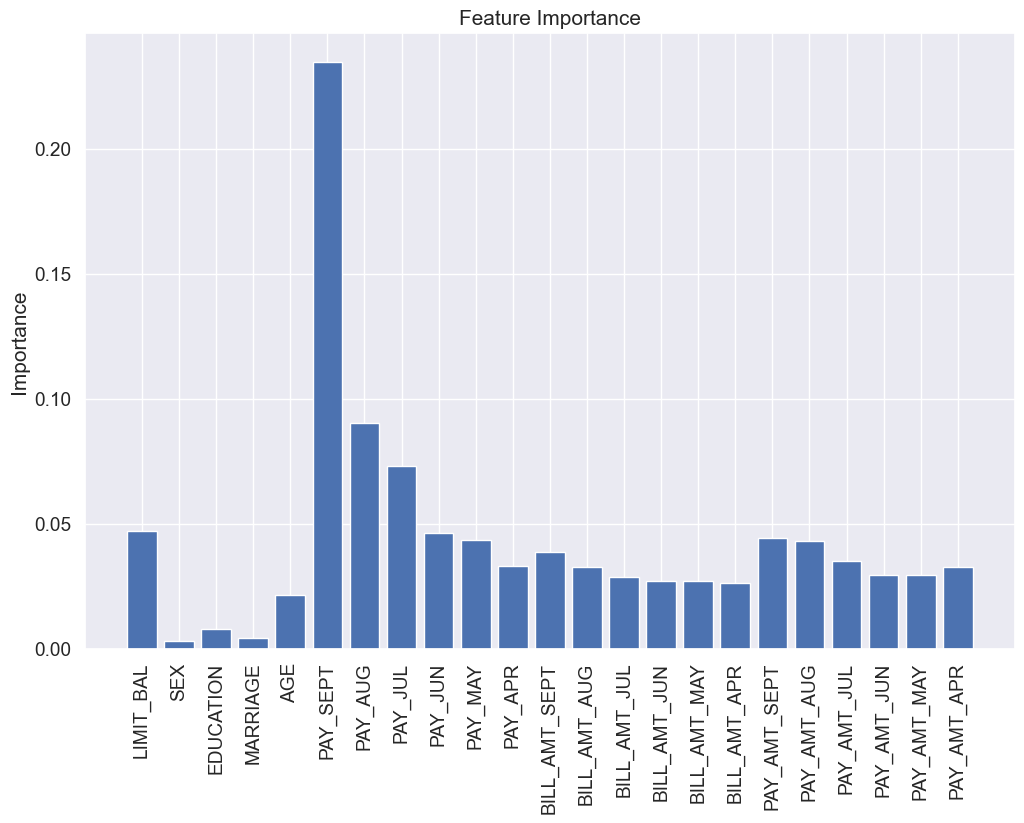

In [129]:
# Menghitung feature importance
features = X.columns
importances = RF.feature_importances_

# Membuat plot bar untuk feature importance
plt.bar(features, importances)
plt.xticks(rotation=90)
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.show()


Training Accuracy Score:  0.8263498144379265
Testing Accuracy Score:  0.7742857142857142
Precision on test data:  0.5069124423963134
Recall on test data:  0.5711318795430945
F1 score on test data:  0.537109375
Train ROC AUC score:  0.7728561199266033
Test ROC AUC score:  0.7029276944826996

Classification Report on Train data
              precision    recall  f1-score   support

           0       0.87      0.91      0.89     12503
           1       0.68      0.59      0.63      4203

    accuracy                           0.83     16706
   macro avg       0.77      0.75      0.76     16706
weighted avg       0.82      0.83      0.82     16706


Classification Report on Test data
              precision    recall  f1-score   support

           0       0.83      0.87      0.85      3115
           1       0.57      0.51      0.54      1085

    accuracy                           0.77      4200
   macro avg       0.70      0.69      0.69      4200
weighted avg       0.77      0.77   

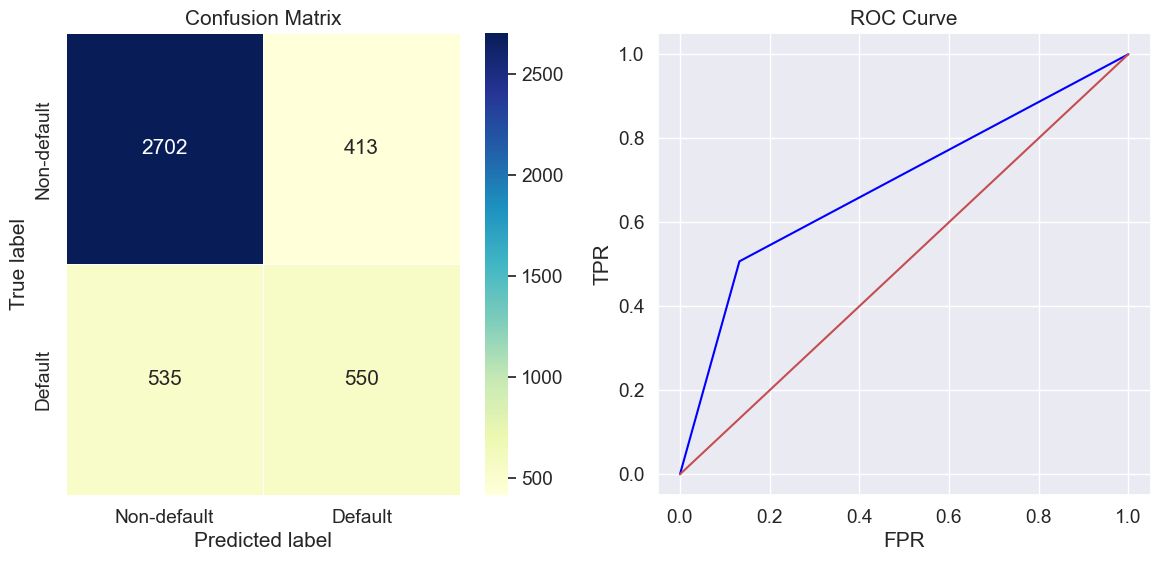

{'Train accuracy': 0.8263498144379265,
 'Test accuracy': 0.7742857142857142,
 'Precision': 0.5069124423963134,
 'Recall': 0.5711318795430945,
 'F1 Score': 0.537109375,
 'Train ROC AUC': 0.7728561199266033,
 'Test ROC AUC': 0.7029276944826996}

In [130]:
# Mengevaluasi model pada data training dan testing
X_test_scaled = scaler.transform(X_test)
helper(RF, X_train_scaled, y_train, X_test_scaled, y_test)

In [131]:
logger.info('MODEL - RANDOM FOREST ENDS!')

# 4. Support Vector Machine

In [133]:
logger.info('MODEL - SUPPORT VECTOR MACHINE STARTS!')

In [134]:
#Membuat objek model SVM
SVM = SVC(kernel='linear',
C=1.0,
class_weight='balanced',
probability=True)

In [135]:
#Melatih model pada data training
SVM.fit(X_train_scaled, y_train)

SVC(class_weight='balanced', kernel='linear', probability=True)

In [136]:
#Menghitung feature importance
features = X.columns
importances = SVM.coef_[0]

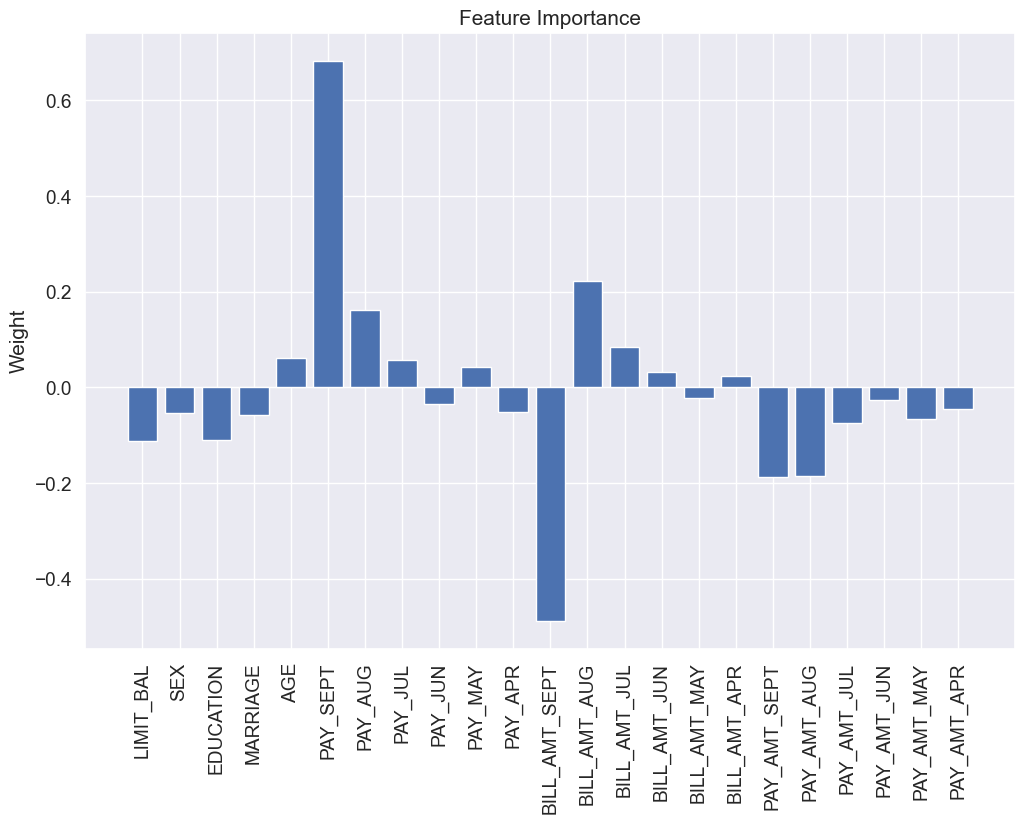

In [138]:
#Membuat plot bar untuk feature importance
plt.bar(features, importances)
plt.xticks(rotation=90)
plt.ylabel('Weight')
plt.title('Feature Importance')
plt.show()


Training Accuracy Score:  0.7699030288519095
Testing Accuracy Score:  0.7652380952380953
Precision on test data:  0.4891815616180621
Recall on test data:  0.5399792315680166
F1 score on test data:  0.5133267522211253
Train ROC AUC score:  0.6875143549021959
Test ROC AUC score:  0.686115658416075

Classification Report on Train data
              precision    recall  f1-score   support

           0       0.83      0.87      0.85     12564
           1       0.54      0.48      0.51      4142

    accuracy                           0.77     16706
   macro avg       0.69      0.67      0.68     16706
weighted avg       0.76      0.77      0.77     16706


Classification Report on Test data
              precision    recall  f1-score   support

           0       0.83      0.86      0.85      3137
           1       0.54      0.49      0.51      1063

    accuracy                           0.77      4200
   macro avg       0.69      0.67      0.68      4200
weighted avg       0.76      0

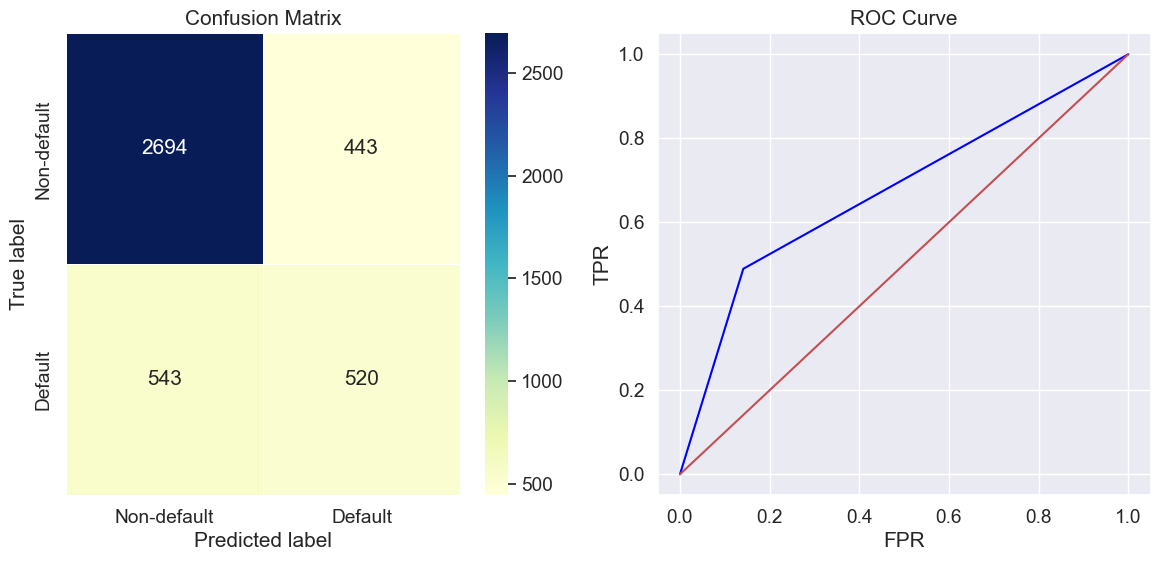

{'Train accuracy': 0.7699030288519095,
 'Test accuracy': 0.7652380952380953,
 'Precision': 0.4891815616180621,
 'Recall': 0.5399792315680166,
 'F1 Score': 0.5133267522211253,
 'Train ROC AUC': 0.6875143549021959,
 'Test ROC AUC': 0.686115658416075}

In [139]:
#Mengevaluasi model pada data training dan testing
X_test_scaled = scaler.transform(X_test)
helper(SVM, X_train_scaled, y_train, X_test_scaled, y_test)

In [141]:
logger.info('MODEL - SUPPORT VECTOR MACHINE ENDS!')

# 5. XGBoostClassifier

In [145]:
logger.info('MODEL - XGBoost STARTS!')

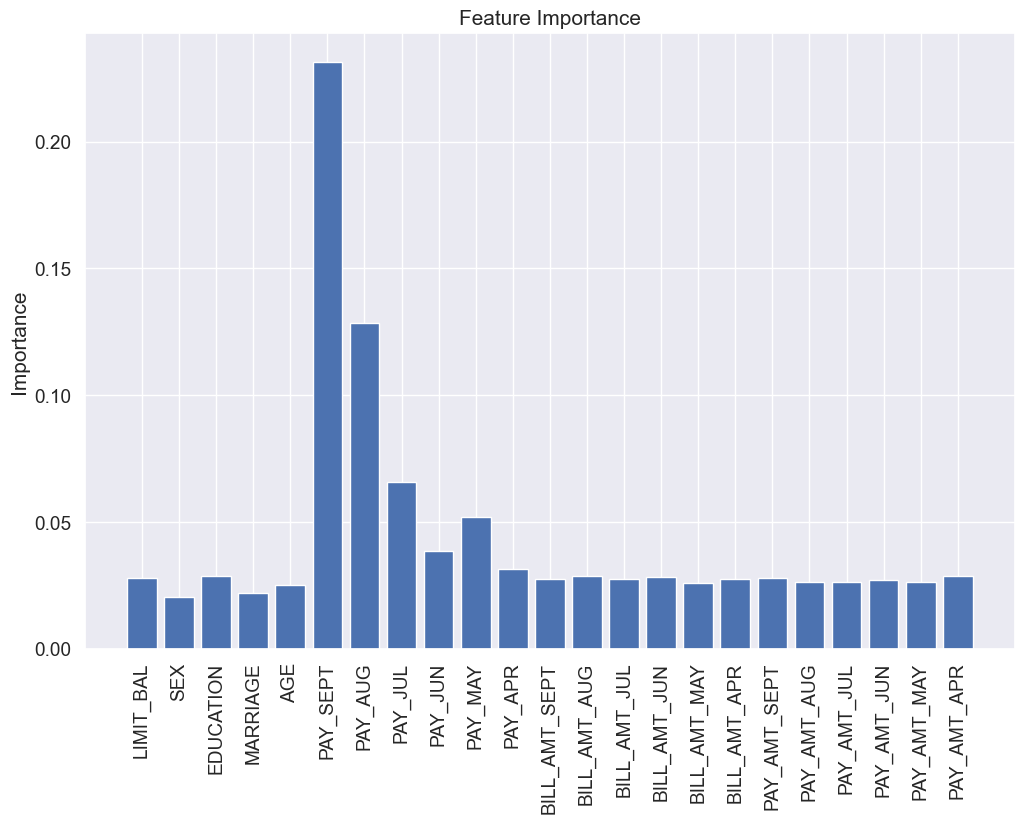


Training Accuracy Score:  0.9157189033880043
Testing Accuracy Score:  0.8019047619047619
Precision on test data:  0.6219739292364991
Recall on test data:  0.34683281412253375
F1 score on test data:  0.44533333333333336
Train ROC AUC score:  0.8206092651243585
Test ROC AUC score:  0.6420602130544706

Classification Report on Train data
              precision    recall  f1-score   support

           0       0.99      0.91      0.95     14190
           1       0.65      0.95      0.77      2516

    accuracy                           0.92     16706
   macro avg       0.82      0.93      0.86     16706
weighted avg       0.94      0.92      0.92     16706


Classification Report on Test data
              precision    recall  f1-score   support

           0       0.94      0.83      0.88      3663
           1       0.35      0.62      0.45       537

    accuracy                           0.80      4200
   macro avg       0.64      0.73      0.66      4200
weighted avg       0.86    

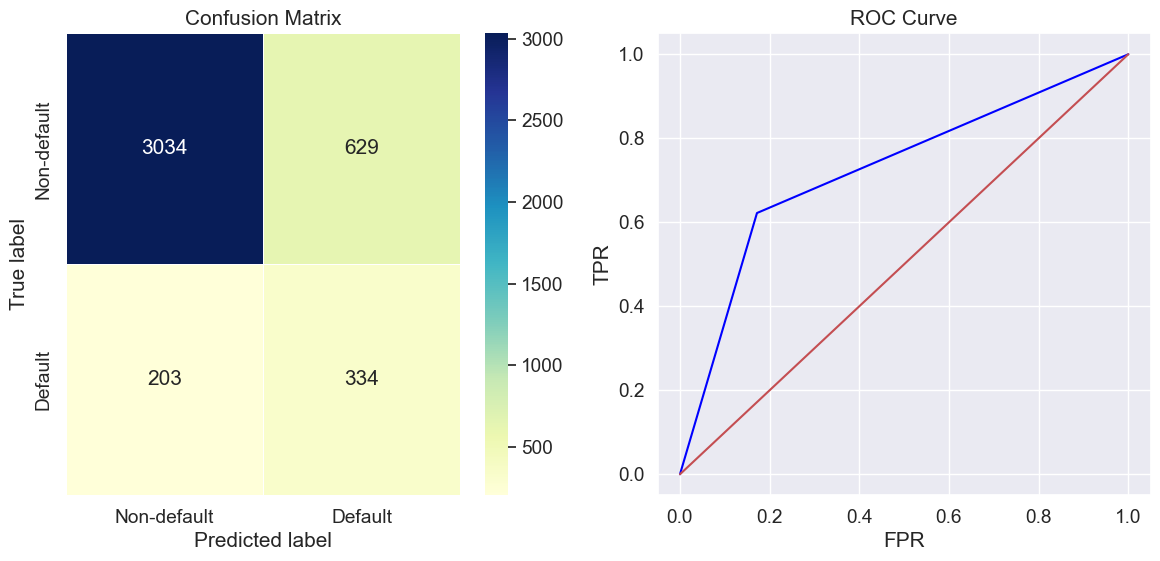

{'Train accuracy': 0.9157189033880043,
 'Test accuracy': 0.8019047619047619,
 'Precision': 0.6219739292364991,
 'Recall': 0.34683281412253375,
 'F1 Score': 0.44533333333333336,
 'Train ROC AUC': 0.8206092651243585,
 'Test ROC AUC': 0.6420602130544706}

In [146]:
import xgboost as xgb
# Membuat objek model XGBoost
XGB = xgb.XGBClassifier(n_estimators=100, 
                        max_depth=10, 
                        learning_rate=0.1, 
                        subsample=0.5, 
                        colsample_bytree=0.5)

# Melatih model pada data training
XGB.fit(X_train_scaled, y_train)

# Menghitung feature importance
features = X.columns
importances = XGB.feature_importances_

# Membuat plot bar untuk feature importance
plt.bar(features, importances)
plt.xticks(rotation=90)
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.show()

# Mengevaluasi model pada data training dan testing
X_test_scaled = scaler.transform(X_test)
helper(XGB, X_train_scaled, y_train, X_test_scaled, y_test)

In [147]:
logger.info('MODEL - XGBoost ENDS!')

In [148]:
logger.info('MODELING ENDS!')

# Feature Engineering

In [150]:
logger.info('FEATURE ENGINEERING STARTS!')

In [151]:
CC_DF_FE = X_y_train.copy()

In [152]:
CC_DF_FE.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,...,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,defaulter
15345,100000,2,1,2,30,1,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,0
8476,200000,1,2,1,30,1,-2,-2,-2,-2,...,736,736,316,736,736,736,736,316,1156,0
9052,410000,2,1,2,31,0,0,0,0,0,...,135954,134250,129971,15003,15877,30000,14250,9971,27380,0
17206,180000,2,2,1,41,-1,-1,-1,-1,-1,...,3070,8263,12663,12069,9443,3262,8302,12668,5502,0
16188,80000,1,2,2,42,1,4,3,2,0,...,81545,51338,50826,0,639,0,50918,2000,2000,0


In [153]:
CC_DF_FE.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_SEPT',
       'PAY_AUG', 'PAY_JUL', 'PAY_JUN', 'PAY_MAY', 'PAY_APR', 'BILL_AMT_SEPT',
       'BILL_AMT_AUG', 'BILL_AMT_JUL', 'BILL_AMT_JUN', 'BILL_AMT_MAY',
       'BILL_AMT_APR', 'PAY_AMT_SEPT', 'PAY_AMT_AUG', 'PAY_AMT_JUL',
       'PAY_AMT_JUN', 'PAY_AMT_MAY', 'PAY_AMT_APR', 'defaulter'],
      dtype='object')

# AVG_BILL_AMT (creating new column)

In [173]:
CC_DF_FE['AVG_BILL_AMT']=(CC_DF_FE['BILL_AMT_SEPT']+CC_DF_FE['BILL_AMT_AUG']+CC_DF_FE['BILL_AMT_JUL']+CC_DF_FE['BILL_AMT_JUN']+CC_DF_FE['BILL_AMT_MAY']+CC_DF_FE['BILL_AMT_APR']/6)

# AVG_PAY_AMT (creating new column)

In [176]:
CC_DF_FE['AVG_PAY_AMT']=(CC_DF_FE['PAY_AMT_SEPT']+CC_DF_FE['PAY_AMT_AUG']+CC_DF_FE['PAY_AMT_JUL']+CC_DF_FE['PAY_AMT_JUN']+CC_DF_FE['PAY_AMT_MAY']+CC_DF_FE['PAY_AMT_APR']/6)

In [178]:
CC_DF_FE.tail()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,...,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,defaulter,AVG_BILL_AMT,AVG_PAY_AMT
11284,90000,2,2,1,27,0,0,0,0,0,...,24973,2900,2012,1603,1208,1000,707,0,271609.166667,8840.833333
11964,210000,2,2,2,28,0,0,0,0,2,...,35018,2000,5000,8000,0,5000,0,0,160918.333333,20000.000000
5390,50000,2,1,2,25,0,0,0,0,0,...,39034,5000,2000,1500,2000,4000,1364,1,226641.666667,14727.333333
860,200000,2,1,2,27,-1,-1,-2,-2,-1,...,0,0,0,0,101,0,0,0,235.000000,101.000000
15795,200000,1,1,1,39,0,0,0,0,0,...,5799,20387,2023,5060,1549,3029,8419,0,232325.500000,33451.166667


In [180]:
X=CC_DF_FE.drop('defaulter',axis=1)
y=CC_DF_FE['defaulter']

In [182]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

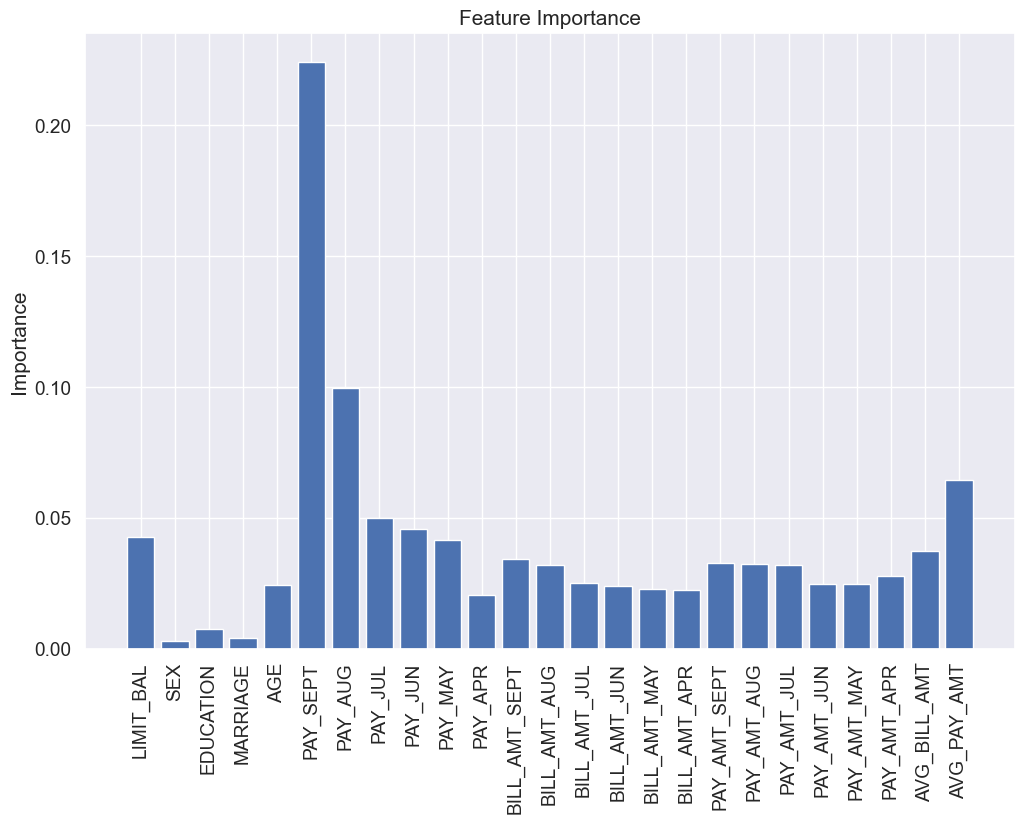


Training Accuracy Score:  0.8370248428614188
Testing Accuracy Score:  0.7929383602633154
Precision on test data:  0.525564803804994
Recall on test data:  0.601360544217687
F1 score on test data:  0.5609137055837563
Train ROC AUC score:  0.7811474118738425
Test ROC AUC score:  0.7241555310271404

Classification Report on Train data
              precision    recall  f1-score   support

           0       0.88      0.91      0.89     10121
           1       0.68      0.62      0.65      3243

    accuracy                           0.84     13364
   macro avg       0.78      0.76      0.77     13364
weighted avg       0.83      0.84      0.83     13364


Classification Report on Test data
              precision    recall  f1-score   support

           0       0.85      0.88      0.86      2501
           1       0.60      0.53      0.56       841

    accuracy                           0.79      3342
   macro avg       0.72      0.70      0.71      3342
weighted avg       0.79      0.

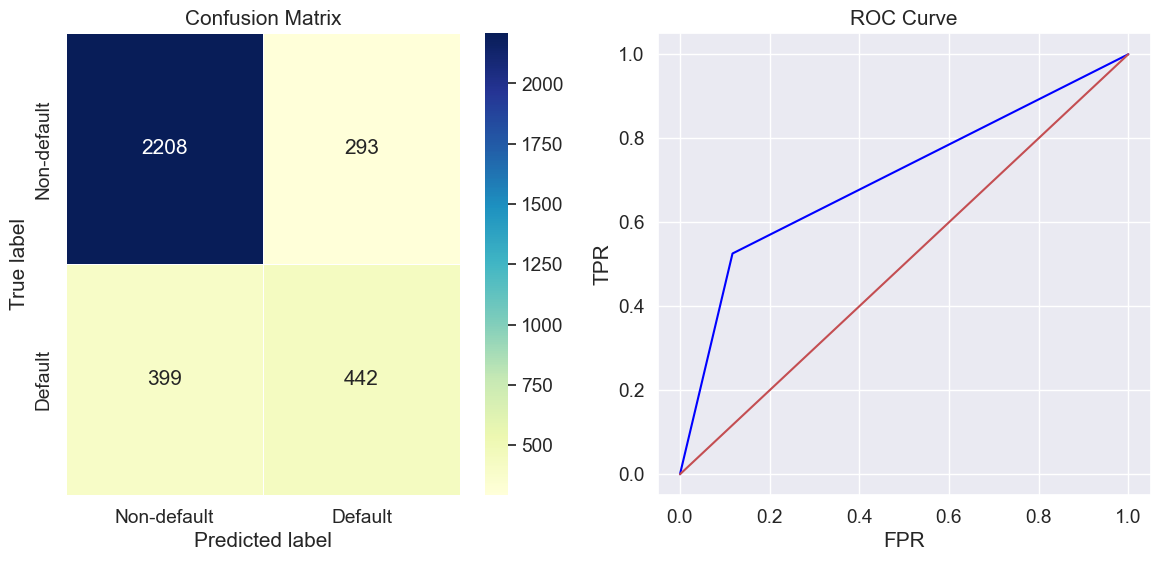

{'Train accuracy': 0.8370248428614188,
 'Test accuracy': 0.7929383602633154,
 'Precision': 0.525564803804994,
 'Recall': 0.601360544217687,
 'F1 Score': 0.5609137055837563,
 'Train ROC AUC': 0.7811474118738425,
 'Test ROC AUC': 0.7241555310271404}

In [184]:

RF_Final = RandomForestClassifier(n_estimators=100, 
                             criterion='gini', 
                             max_depth=10, 
                             min_samples_split=5, 
                             min_samples_leaf=5, 
                             class_weight='balanced')

# Melatih model pada data training
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)
RF_Final.fit(X_train_scaled,y_train)

# Menghitung feature importance
features = X.columns
importances = RF_Final.feature_importances_

# Membuat plot bar untuk feature importance
plt.bar(features, importances)
plt.xticks(rotation=90)
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.show()

# Mengevaluasi model pada data training dan testing
X_test_scaled = scaler.transform(X_test)
helper(RF_Final, X_train_scaled, y_train, X_test_scaled, y_test)

In [185]:
logger.info('FEATURE ENGINEERING ENDS!')

# Final model training with SVC and new column AVG_BILL

In [187]:
logger.info('FINAL MODEL BUILDING STARTS!')

In [188]:
X_y_train.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,...,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,defaulter
15345,100000,2,1,2,30,1,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,0
8476,200000,1,2,1,30,1,-2,-2,-2,-2,...,736,736,316,736,736,736,736,316,1156,0
9052,410000,2,1,2,31,0,0,0,0,0,...,135954,134250,129971,15003,15877,30000,14250,9971,27380,0
17206,180000,2,2,1,41,-1,-1,-1,-1,-1,...,3070,8263,12663,12069,9443,3262,8302,12668,5502,0
16188,80000,1,2,2,42,1,4,3,2,0,...,81545,51338,50826,0,639,0,50918,2000,2000,0


In [189]:
X_y_train['AVG_BILL_AMT']=(X_y_train['BILL_AMT_SEPT']+X_y_train['BILL_AMT_AUG']+X_y_train['BILL_AMT_JUL']+X_y_train['BILL_AMT_JUN']+X_y_train['BILL_AMT_MAY']+X_y_train['BILL_AMT_APR']/6)

In [190]:
X_y_train.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,...,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,defaulter,AVG_BILL_AMT
15345,100000,2,1,2,30,1,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,0.000000
8476,200000,1,2,1,30,1,-2,-2,-2,-2,...,736,316,736,736,736,736,316,1156,0,3732.666667
9052,410000,2,1,2,31,0,0,0,0,0,...,134250,129971,15003,15877,30000,14250,9971,27380,0,693423.833333
17206,180000,2,2,1,41,-1,-1,-1,-1,-1,...,8263,12663,12069,9443,3262,8302,12668,5502,0,39127.500000
16188,80000,1,2,2,42,1,4,3,2,0,...,51338,50826,0,639,0,50918,2000,2000,0,421988.000000


In [191]:
X=X_y_train.drop('defaulter',axis=1)
y=X_y_train['defaulter']

In [192]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)

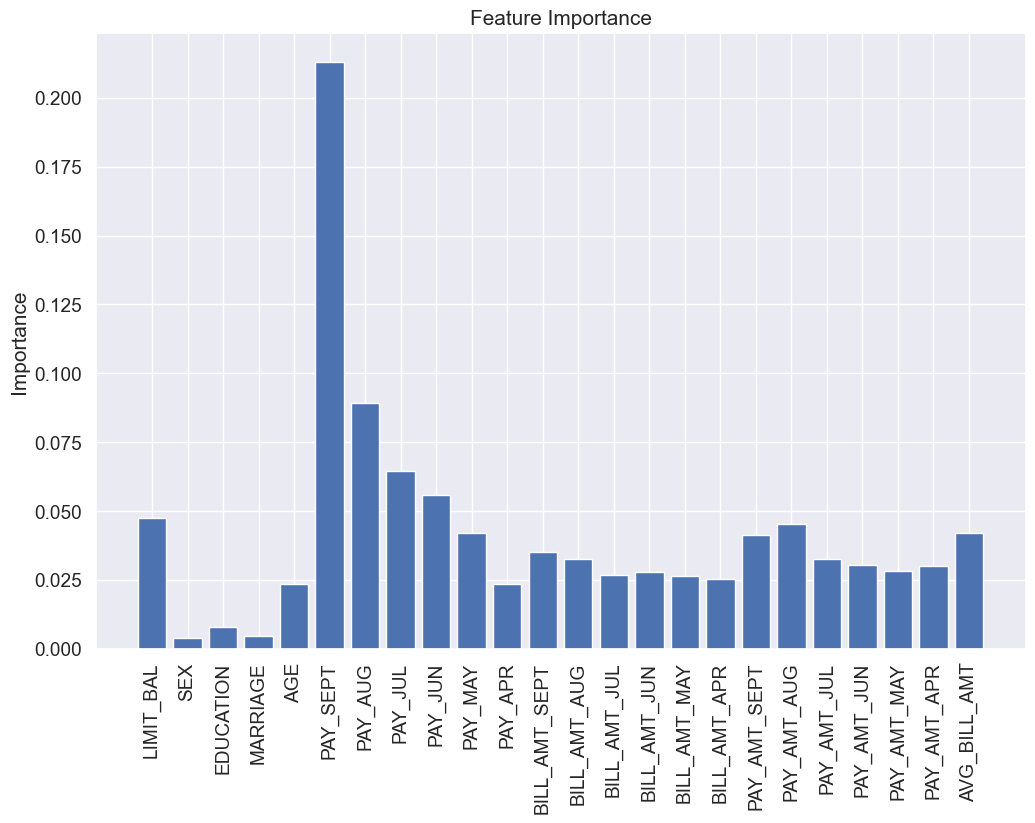


Training Accuracy Score:  0.8343310386111943
Testing Accuracy Score:  0.7944344703770198
Precision on test data:  0.5285714285714286
Recall on test data:  0.6040816326530613
F1 score on test data:  0.5638095238095238
Train ROC AUC score:  0.7788090869609172
Test ROC AUC score:  0.726091449237923

Classification Report on Train data
              precision    recall  f1-score   support

           0       0.88      0.91      0.89     10095
           1       0.68      0.61      0.64      3269

    accuracy                           0.83     13364
   macro avg       0.78      0.76      0.77     13364
weighted avg       0.83      0.83      0.83     13364


Classification Report on Test data
              precision    recall  f1-score   support

           0       0.85      0.88      0.87      2502
           1       0.60      0.53      0.56       840

    accuracy                           0.79      3342
   macro avg       0.73      0.71      0.71      3342
weighted avg       0.79      0

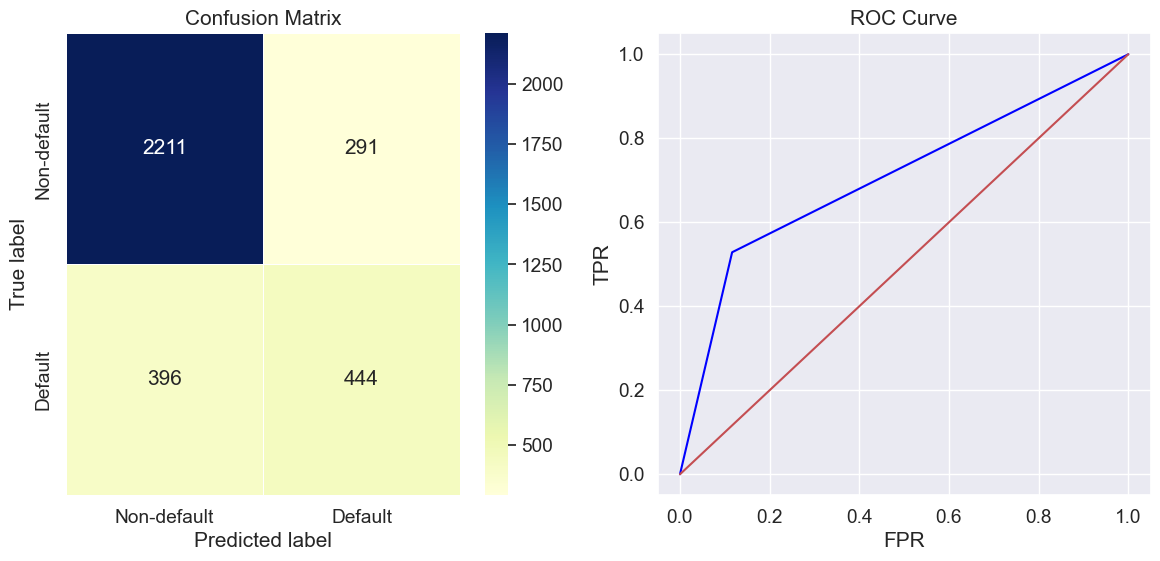

{'Train accuracy': 0.8343310386111943,
 'Test accuracy': 0.7944344703770198,
 'Precision': 0.5285714285714286,
 'Recall': 0.6040816326530613,
 'F1 Score': 0.5638095238095238,
 'Train ROC AUC': 0.7788090869609172,
 'Test ROC AUC': 0.726091449237923}

In [193]:
RF_Final = RandomForestClassifier(n_estimators=100, 
                             criterion='gini', 
                             max_depth=10, 
                             min_samples_split=5, 
                             min_samples_leaf=5, 
                             class_weight='balanced')

# Melatih model pada data training
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)
RF_Final.fit(X_train_scaled,y_train)

# Menghitung feature importance
features = X.columns
importances = RF_Final.feature_importances_

# Membuat plot bar untuk feature importance
plt.bar(features, importances)
plt.xticks(rotation=90)
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.show()

# Mengevaluasi model pada data training dan testing
X_test_scaled = scaler.transform(X_test)
helper(RF_Final, X_train_scaled, y_train, X_test_scaled, y_test)

In [194]:
logger.info('FINAL MODEL BUILDING ENDS!')

# Saving the file

In [212]:
logger.info('SAVING THE MODEL...')

In [214]:
pickle.dump(RF_Final, open('ccdp.pkl', 'wb'))

logger.info('MODEL SAVED!')

In [216]:
pickle.dump(scaler, open('scaler.pkl', 'wb'))

**Compress the model.pkl, to easy the process of deployement**

In [219]:
import bz2 as bz2

In [221]:
def compressed_pickle(title, data):
  with bz2.BZ2File(title + '.pbz2', 'w') as f:
    pickle.dump(data, f)

In [225]:
compressed_pickle('ccdp', RF_Final)

In [227]:
logger.info('PROJECT RUNNING ENDS!')

##### 